# Getting Data:  Working with APIs, TEXT analytics & Census

- (part 1) **Introduction to APIs**
- (part 2) **Natural language processing via Philly's 311 API**
    - Word frequencies
    - Sentiment analysis
- (part 3) Pulling **census** data and shape files using Python

In [53]:
import geopandas as gpd
import holoviews as hv
import hvplot.pandas
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# Show all columns
pd.options.display.max_columns = 999

ImportError: cannot import name 'ImportedStyleSheet' from 'bokeh.models' (/Users/delmelle/miniforge3/lib/python3.10/site-packages/bokeh/models/__init__.py)

# PART 1: Introduction to APIs

Or, how to pull data from the web using Python

**Application programming interface (API):**

> (noun): A particular set of rules and specifications that software programs can follow to communicate with each other and exchange data.

**Example APIs**

- Socrata Open Data: [https://dev.socrata.com/](https://dev.socrata.com/)
- Open Data Philly: [https://opendataphilly.org](https://opendataphilly.org)
- US Census Bureau: [https://www.census.gov/data/developers/data-sets.html](https://www.census.gov/data/developers/data-sets.html)
- Bureau of Labor Statistics: [https://www.bls.gov/developers/](https://www.bls.gov/developers/)
- US Geological Survey: [https://www.usgs.gov/products/data-and-tools/apis](https://www.usgs.gov/products/data-and-tools/apis)
- US Environmental Protection Agency: [https://www.epa.gov/enviro/web-services](https://www.epa.gov/enviro/web-services)
- Google APIs: [https://console.cloud.google.com/apis/library](https://console.cloud.google.com/apis/library)
- Facebook: [https://developers.facebook.com/docs/apis-and-sdks/](https://developers.facebook.com/docs/apis-and-sdks/)
- Twitter: [https://developer.twitter.com/en/docs/api-reference-index.html](https://developer.twitter.com/en/docs/api-reference-index) (RIP 💀)
- Foursquare: [https://developer.foursquare.com/](https://developer.foursquare.com/)
- Instagram: [https://www.instagram.com/developer/](https://www.instagram.com/developer/)
- Yelp: [https://www.yelp.com/developers](https://www.instagram.com/developer/)

When accessing data via API, many services will require you to register an API key to prevent you from overloading the service with requests.

###  Example #1: Automated data feeds

The simplest form of API is when data providers maintain data files via a URL that are automatically updated with new data over time. 

#### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes, and data is provided in GeoJSON format over the web. 

The API has a separate endpoint for each version of the data that users might want. No authentication is required.

API documentation:

[http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php](http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php)

Sample API endpoint, for magnitude 4.5+ earthquakes in past day:

[http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson](http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson)

In [3]:
# Download data on magnitude 2.5+ quakes from the past week
endpoint_url = (
    "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
)
earthquakes = gpd.read_file(endpoint_url)

In [4]:
earthquakes.head()

id   mag                                       place  \
0    ci40963760  2.95               4 km E of Stovepipe Wells, CA   
1    pr71463433  2.54              2 km SW of Indios, Puerto Rico   
2    pr71463408  3.11       40 km NNW of San Antonio, Puerto Rico   
3  pr2024298000  3.49  89 km NNE of Cruz Bay, U.S. Virgin Islands   
4    us7000nn08  4.40        84 km NNW of Kimbe, Papua New Guinea   

            time        updated    tz  \
0  1729808648100  1729809178646  None   
1  1729808448810  1729809375950  None   
2  1729806660140  1729809456420  None   
3  1729804842780  1729808833310  None   
4  1729803660713  1729804978040  None   

                                                 url  \
0  https://earthquake.usgs.gov/earthquakes/eventp...   
1  https://earthquake.usgs.gov/earthquakes/eventp...   
2  https://earthquake.usgs.gov/earthquakes/eventp...   
3  https://earthquake.usgs.gov/earthquakes/eventp...   
4  https://earthquake.usgs.gov/earthquakes/eventp...   

                                              detail  felt  cdi  mmi alert  \
0  https://earthquake.usgs.gov/earthquakes/feed/v...   1.0  2.0  NaN  None   
1  https://earthquake.usgs.gov/earthquakes/feed/v...   NaN  NaN  NaN  None   
2  https://earthquake.usgs.gov/earthquakes/feed/v...   NaN  NaN  NaN  None   
3  https://earthquake.usgs.gov/earthquakes/feed/v...   NaN  NaN  NaN  None   
4  https://earthquake.usgs.gov/earthquakes/feed/v...   NaN  NaN  NaN  None   

      status  tsunami  sig net        code             ids sources  \
0  automatic        0  134  ci    40963760    ,ci40963760,    ,ci,   
1   reviewed        0   99  pr    71463433    ,pr71463433,    ,pr,   
2   reviewed        0  149  pr    71463408    ,pr71463408,    ,pr,   
3   reviewed        0  187  pr  2024298000  ,pr2024298000,    ,pr,   
4   reviewed        0  298  us    7000nn08    ,us7000nn08,    ,us,   

                                               types   nst    dmin   rms  \
0  ,dyfi,nearby-cities,origin,phase-data,scitech-...  24.0  0.4475  0.15   
1                                ,origin,phase-data,  10.0  0.0434  0.17   
2                                ,origin,phase-data,   9.0  0.3849  0.16   
3                                ,origin,phase-data,   5.0  0.6889  0.29   
4                                ,origin,phase-data,  64.0  2.4010  0.87   

     gap magType        type  \
0  197.0      ml  earthquake   
1  163.0      md  earthquake   
2  311.0      md  earthquake   
3  297.0      md  earthquake   
4   46.0      mb  earthquake   

                                               title  \
0              M 3.0 - 4 km E of Stovepipe Wells, CA   
1             M 2.5 - 2 km SW of Indios, Puerto Rico   
2      M 3.1 - 40 km NNW of San Antonio, Puerto Rico   
3  M 3.5 - 89 km NNE of Cruz Bay, U.S. Virgin Isl...   
4       M 4.4 - 84 km NNW of Kimbe, Papua New Guinea   

                                 geometry  
0   POINT Z (-117.10484 36.60000 0.88000)  
1   POINT Z (-66.83367 17.97417 14.38000)  
2    POINT Z (-67.27783 18.82033 6.23000)  
3   POINT Z (-64.51350 19.09580 61.00000)  
4  POINT Z (149.84430 -4.84270 614.14500)

In [5]:
earthquakes.explore()

Lots of other automated feeds available, updated every minute:

![](imgs/usgs-1.png){width=20}
![](imgs/usgs-2.png){width=20}


### Example #2: The CARTO API

- Philadelphia hosts the majority of its open data on OpenDataPhilly in the cloud using CARTO
- They provide an API to download the data
- You can access the API documentation on the dataset page on OpenDataPhilly

- For example: shooting victims in Philadelphia

[https://www.opendataphilly.org/dataset/shooting-victims](https://www.opendataphilly.org/dataset/shooting-victims)

and the API documentation:

[https://cityofphiladelphia.github.io/carto-api-explorer/#shootings](https://cityofphiladelphia.github.io/carto-api-explorer/#shootings)

#### The anatomy of an API request

![](imgs/carto-api.png){width="600"}

- **Base URL**: shown in blue
- **?**: shown in purple; it separates the base URL from the query parameters
- **Query parameters**: underlined in red; these parameters allow the user to customize the data response
- **&**: underlined in green; the separator between the query parameters

- So, let's break down the URL into its component parts:

In [6]:
# The API endpoint
carto_api_endpoint = "https://phl.carto.com/api/v2/sql"

# The query parameters
params = {
    "q": "SELECT * FROM shootings",
    "format": "geojson",
    "skipfields": "cartodb_id",
    # Note: we won't need the filename parameter, since we're not saving the data to a file
    # "filename": "shootings"
}

### Note: SQL Queries

The `q` parameter is a *SQL query*. It allows you to select a specific subset of data from the larger database.

CARTO API documentation: [https://carto.com/developers/sql-api/](https://carto.com/developers/sql-api/)

SQL documentation: [https://www.postgresql.org/docs/9.1/sql.html](https://www.postgresql.org/docs/9.1/sql.html)

**General Query Syntax**

`SELECT [field names] FROM [table name] WHERE [query]`

#### Let's try it out in Python

We'll use Python's `requests` library to use a "get" request to query the API endpoint with our desired query. Similar to our web scraping requests!

In [7]:
import requests

Let's make the get request and pass the query parameters via the `params` keyword:

In [8]:
response = requests.get(carto_api_endpoint, params=params)

response

<Response [200]>

In [9]:
# Get the returned data in JSON format
# This is a dictionary
features = response.json()

In [10]:
type(features)

dict

In [11]:
# What are the keys?
list(features.keys())

['type', 'features']

In [12]:
features["type"]

'FeatureCollection'

In [13]:
# Let's look at the first feature
features["features"][0]

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-75.164085, 39.987294]},
 'properties': {'objectid': 15757791,
  'year': 2022,
  'dc_key': '202222011425.0',
  'code': '400',
  'date_': '2022-03-02T00:00:00Z',
  'time': '20:16:00',
  'race': 'B',
  'sex': 'M',
  'age': '25',
  'wound': 'Foot',
  'officer_involved': 'N',
  'offender_injured': 'N',
  'offender_deceased': 'N',
  'location': '1800 BLOCK W SUSQUEHANNA AVE',
  'latino': 0,
  'point_x': -75.16408487,
  'point_y': 39.98729413,
  'dist': '22',
  'inside': 0,
  'outside': 1,
  'fatal': 0}}

In [14]:
shootings = gpd.GeoDataFrame.from_features(features, crs="EPSG:4326")

Don't forget to specify the CRS of the input data when using `GeoDataFrame.from_features()`.

In [15]:
shootings.head()

geometry  objectid  year          dc_key  code  \
0  POINT (-75.16409 39.98729)  15757791  2022  202222011425.0   400   
1  POINT (-75.06178 40.02656)  15757792  2021  202115052210.0  3400   
2  POINT (-75.06598 40.03576)  15757793  2023  202315036735.0   300   
3  POINT (-75.07506 40.01978)  15757794  2024  202415002940.0   400   
4  POINT (-75.16106 39.99173)  15757795  2018  201822018178.0   400   

                  date_      time race sex   age     wound officer_involved  \
0  2022-03-02T00:00:00Z  20:16:00    B   M    25      Foot                N   
1  2021-07-15T00:00:00Z  19:59:00    B   M  None   Abdomen                N   
2  2023-05-17T00:00:00Z  21:02:00    W   M    49  Multiple                N   
3  2024-01-11T00:00:00Z  23:24:00    B   M    20      Back                N   
4  2018-03-11T00:00:00Z  03:55:00    B   M    32       Leg                N   

  offender_injured offender_deceased                      location  latino  \
0                N                 N  1800 BLOCK W SUSQUEHANNA AVE     0.0   
1                N                 N        6200 BLOCK MULBERRY ST     0.0   
2                N                 N   6500 BLOCK E ROOSEVELT BLVD     1.0   
3                N                 N         5200 BLOCK MARLOWE ST     0.0   
4                N                 N       2500 BLOCK N Bouvier St     0.0   

     point_x    point_y dist  inside  outside  fatal  
0 -75.164085  39.987294   22     0.0      1.0    0.0  
1 -75.061776  40.026558   15     0.0      1.0    0.0  
2 -75.065978  40.035761   15     0.0      1.0    0.0  
3 -75.075062  40.019783   15     0.0      1.0    0.0  
4 -75.161063  39.991727   22     0.0      1.0    0.0

#### Exercise: Visualizing shootings data
**Step 1: Prep the data**

- Drop rows where the geometry is NaN
- Convert to a better CRS (e.g., 3857)
- Load city limits from Open Data Philly and trim to those only within city limits (some shootings have wrong coordinates, outside Philadelphia!)

In [16]:
# make sure we remove missing geometries
shootings = shootings.dropna(subset=["geometry"])

# convert to a better CRS
shootings = shootings.to_crs(epsg=3857)

In [17]:
city_limits = gpd.read_file(
    "https://opendata.arcgis.com/datasets/405ec3da942d4e20869d4e1449a2be48_0.geojson"
).to_crs(epsg=3857)

In [18]:
# Remove any shootings that are outside the city limits
shootings = gpd.sjoin(shootings, city_limits, predicate="within", how="inner").drop(
    columns=["index_right"]
)

**Step 2: Plot the points**

A quick plot with geopandas to show the shootings as points, and overlay Philadelphia ZIP codes.

In [19]:
# From Open Data Philly
zip_codes = gpd.read_file(
    "https://opendata.arcgis.com/datasets/b54ec5210cee41c3a884c9086f7af1be_0.geojson"
).to_crs(epsg=3857)

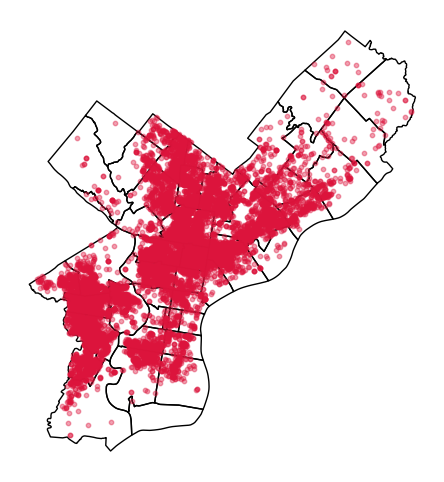

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))

# ZIP Codes
zip_codes.to_crs(epsg=3857).plot(ax=ax, facecolor="none", edgecolor="black")

# Shootings
shootings.plot(ax=ax, color="crimson", markersize=10, alpha=0.4)
ax.set_axis_off()

**Step 3: Make a (more useful) hex bin map**

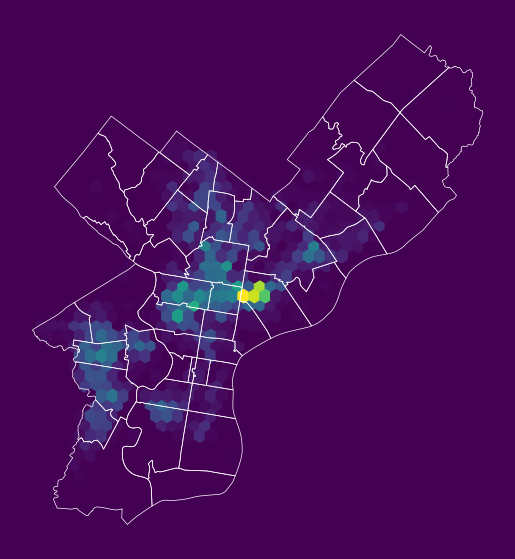

In [21]:
# Initialize the axes
fig, ax = plt.subplots(figsize=(7, 7), facecolor=plt.get_cmap("viridis")(0))

# Convert to Web Mercator and plot the hexbins
x = shootings.geometry.x
y = shootings.geometry.y
ax.hexbin(x, y, gridsize=40, mincnt=1, cmap="viridis")

# overlay the city limits
zip_codes.to_crs(epsg=3857).plot(
    ax=ax, facecolor="none", linewidth=0.5, edgecolor="white"
)

ax.set_axis_off()

#### Example: Count the total number of rows in a table

The SQL `COUNT` function can be applied to count all rows.

In [28]:
response = requests.get(
    carto_api_endpoint, params={"q": "SELECT COUNT(*) FROM shootings"}
)

In [29]:
response.json()

{'rows': [{'count': 16258}],
 'time': 0.004,
 'fields': {'count': {'type': 'number', 'pgtype': 'int8'}},
 'total_rows': 1}

#### Example: Select all columns, limiting the total number returned

The `LIMIT` function limits the number of returned rows. It is very useful for taking a quick look at the format of a database.

In [31]:
# Limit the returned data to only 1 row
query = "SELECT * FROM shootings LIMIT 1"

# Make the request
params = {"q": query, "format": "geojson"}
response = requests.get(carto_api_endpoint, params=params)

Create the GeoDataFrame:

In [32]:
df = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

df

geometry  cartodb_id  objectid  year          dc_key  \
0  POINT (-75.16409 39.98729)           1  15757791  2022  202222011425.0   

  code                 date_      time race sex age wound officer_involved  \
0  400  2022-03-02T00:00:00Z  20:16:00    B   M  25  Foot                N   

  offender_injured offender_deceased                      location  latino  \
0                N                 N  1800 BLOCK W SUSQUEHANNA AVE       0   

     point_x    point_y dist  inside  outside  fatal  
0 -75.164085  39.987294   22       0        1      0

#### Example: Select by specific column values

Use the `WHERE` function to select a subset where the logical condition is true.

Example #1: Select nonfatal shootings only

# Select nonfatal shootings only
query = "SELECT * FROM shootings WHERE fatal = 0"

In [26]:
# Make the request
params = {"q": query, "format": "geojson"}
response = requests.get(carto_api_endpoint, params=params)

# Make the GeoDataFrame
nonfatal = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

# Print
print("number of nonfatal shootings = ", len(nonfatal))

number of nonfatal shootings =  1


Example #2: Select shootings in 2023

In [27]:
# Make the request
params = {"q": query, "format": "geojson"}
response = requests.get(carto_api_endpoint, params=params)

# Make the GeoDataFrame
shootings_2023 = gpd.GeoDataFrame.from_features(response.json(), crs="EPSG:4326")

# Print
print("number of shootings in 2023 = ", len(shootings_2023))

number of shootings in 2023 =  1


#### At-Home Exercise: Explore trends by month and day of week

##### Step 1: Convert the date column to `DateTime` objects

Add Month and Day of Week columns

In [48]:
# Condddvert the data column to a datetime object
shootings["date"] = pd.to_datetime(shootings["date_"])

# Add new columns: Month and Day of Week
shootings["Month"] = shootings["date"].dt.month
shootings["Day of Week"] = shootings["date"].dt.dayofweek  # Monday is 0, Sunday is 6

##### Step 2: Calculate number of shootings by month and day of week

Use the familiar Groupby --> size()

In [49]:
count = shootings.groupby(["Month", "Day of Week"]).size()
count = count.reset_index(name="Count")
count.head()

Month  Day of Week  Count
0      1            0    180
1      1            1    165
2      1            2    152
3      1            3    159
4      1            4    156

##### Step 3: Make a heatmap using `hvplot`

In [50]:
# Remember 0 is Monday and 6 is Sunday
count.hvplot.heatmap(
    x="Day of Week",
    y="Month",
    C="Count",
    cmap="viridis",
    width=400,
    height=500,
    flip_yaxis=True,
)

:HeatMap   [Day of Week,Month]   (Count)

**Trends:** more shootings on the weekends and in the summer months

# Part 2: Natural Language Processing and the 311 Request API

In part two, we'll pull data using the API for the Philly 311 system, available at: [https://iframe.publicstuff.com/#?client_id=242](https://iframe.publicstuff.com/#?client_id=242)

![](imgs/philly-311.png)


Let's take another look at the address where the site is pulling its data from:

`https://vc0.publicstuff.com/api/2.0/requests_list?client_id=242&device=iframe&limit=35&page=1`


This is just an **API request!** It's an example of a *non-public, internal* API, but we can reverse-engineer it to extract the data we want!

Break it down into it's component parts:

- **Base URL:** [https://vc0.publicstuff.com/api/2.0/requests_list](https://vc0.publicstuff.com/api/2.0/requests_list)
- **Query parameters:** client_id, device, limit, page

It looks likes "client_id" identifies data for the City of Philadelphia, which is definitely a required parameter. Otherwise, the other parameters seem optional, returning the requests on a certain device and viewing page.


Let's test it out. We'll grab 2 requests from the first page:

In [33]:
r = requests.get(
    "https://vc0.publicstuff.com/api/2.0/requests_list",
    params={"client_id": 242, "page": 1, "limit": 2},
)
json = r.json()
json

{'response': {'requests': [{'request': {'id': 16145037,
     'image_thumbnail': '',
     'title': 'Homeless Encampment',
     'description': '',
     'status': 'submitted',
     'address': '939 Cantrell St, Philadelphia, PA 19148, USA',
     'location': '',
     'zipcode': None,
     'foreign_id': '17227562',
     'date_created': 1729812973,
     'count_comments': 0,
     'count_followers': 0,
     'count_supporters': 0,
     'lat': 39.9230822,
     'lon': -75.1624496,
     'user_follows': 0,
     'user_comments': 0,
     'user_request': 0,
     'rank': '1',
     'user': ''}},
   {'request': {'primary_attachment': {'id': 5214022,
      'extension': 'jpg',
      'content_type': 'image/jpeg',
      'url': 'https://d17aqltn7cihbm.cloudfront.net/uploads/37f126626bd5bb81c8271a746d0e38dd',
      'versions': {'small': 'https://d17aqltn7cihbm.cloudfront.net/uploads/small_37f126626bd5bb81c8271a746d0e38dd',
       'medium': 'https://d17aqltn7cihbm.cloudfront.net/uploads/medium_37f126626bd5bb81c8

Now we need to understand the structure of the response. First, access the list of requests:

In [112]:
request_list = json["response"]["requests"]

request_list

[{'request': {'id': 16145037,
   'image_thumbnail': '',
   'title': 'Homeless Encampment',
   'description': '',
   'status': 'submitted',
   'address': '939 Cantrell St, Philadelphia, PA 19148, USA',
   'location': '',
   'zipcode': None,
   'foreign_id': '17227562',
   'date_created': 1729812973,
   'count_comments': 0,
   'count_followers': 0,
   'count_supporters': 0,
   'lat': 39.9230822,
   'lon': -75.1624496,
   'user_follows': 0,
   'user_comments': 0,
   'user_request': 0,
   'rank': '1',
   'user': ''}},
 {'request': {'primary_attachment': {'id': 5214022,
    'extension': 'jpg',
    'content_type': 'image/jpeg',
    'url': 'https://d17aqltn7cihbm.cloudfront.net/uploads/37f126626bd5bb81c8271a746d0e38dd',
    'versions': {'small': 'https://d17aqltn7cihbm.cloudfront.net/uploads/small_37f126626bd5bb81c8271a746d0e38dd',
     'medium': 'https://d17aqltn7cihbm.cloudfront.net/uploads/medium_37f126626bd5bb81c8271a746d0e38dd',
     'large': 'https://d17aqltn7cihbm.cloudfront.net/upload

We need to extract out the "request" key of each list entry. Let's do that and create a DataFrame:

In [113]:
data = pd.DataFrame([r["request"] for r in request_list])
data.head()

id                                    image_thumbnail  \
0  16145037                                                      
1  16145018  https://d17aqltn7cihbm.cloudfront.net/uploads/...   

                 title                                        description  \
0  Homeless Encampment                                                      
1      Illegal Dumping  Business - QUICK STOP 1 Convenience store. The...   

      status                                       address  \
0  submitted  939 Cantrell St, Philadelphia, PA 19148, USA   
1  submitted    1200 Germantown Ave,Philadelphia, PA 19122   

                     location zipcode foreign_id  date_created  \
0                                None   17227562    1729812973   
1  Philadelphia, Pennsylvania   19122   17227552    1729812464   

   count_comments  count_followers  count_supporters        lat        lon  \
0               0                0                 0  39.923082 -75.162450   
1               0                0                 0  39.969846 -75.140877   

   user_follows  user_comments  user_request rank        user  \
0             0              0             0    1               
1             0              0             0    1  joy.patton   

                                  primary_attachment  
0                                                NaN  
1  {'id': 5214022, 'extension': 'jpg', 'content_t...

**GREAT SUCCESS!!**  But we want to build up a larger dataset...let's pull data for the first 3 pages of data. This will take a minute or two...

In [114]:
# Store the data we request
data = []

# Total number of pages
total_pages = 3

# Loop over each page
for page_num in range(1, total_pages + 1):
    # Print out the page number
    print(f"Getting data for page #{page_num}...")

    # Make the request
    r = requests.get(
        "https://vc0.publicstuff.com/api/2.0/requests_list",
        params={
            "client_id": 242,  # Unique identifier for Philadelphia
            "page": page_num,  # What page of data to pull
            "limit": 200,  # How many rows per page
        },
    )
    # Get the json
    d = r.json()

    # Add the new data to our list and save
    data = data + [r["request"] for r in d["response"]["requests"]]

# Create a dataframe
data = pd.DataFrame(data)

Getting data for page #1...
Getting data for page #2...
Getting data for page #3...


In [37]:
len(data)

600

In [115]:
data.head(10)

id                                    image_thumbnail  \
0  16170170                                                      
1  16170155                                                      
2  16170133  https://d17aqltn7cihbm.cloudfront.net/uploads/...   
3  16170111  https://d17aqltn7cihbm.cloudfront.net/uploads/...   
4  16170074                                                      
5  16170045  https://d17aqltn7cihbm.cloudfront.net/uploads/...   
6  16169992                                                      
7  16169993  https://d17aqltn7cihbm.cloudfront.net/uploads/...   
8  16169962                                                      
9  16169958  https://d17aqltn7cihbm.cloudfront.net/uploads/...   

                           title  \
0               Street Light Out   
1                          Other   
2                  Right-of-Way    
3                Illegal Dumping   
4             Dangerous Sidewalk   
5             Dangerous Sidewalk   
6                          Other   
7           Abandoned Automobile   
8         Construction Complaint   
9  Unlicensed Business Complaint   

                                         description     status  \
0  Street light pole was hit by a drunk driver ov...  submitted   
1                                                     submitted   
2                                          undefined  submitted   
3  Right as you enter Grover Washington Middle Sc...  submitted   
4                Bump grid is peeling (risen/lifted)  submitted   
5                                    Broken sidewalk  submitted   
6                                               None  submitted   
7  Blue ford Taurus parked in front of 3645 n 5th...  submitted   
8  Removing a lot of construction materials out o...  submitted   
9  Side apartment being used. \nThis was voted ag...  submitted   

                                            address  \
0  5400 Roosevelt Blvd, Philadelphia, PA 19124, USA   
1       4613 Morris St, Philadelphia, PA 19144, USA   
2        129 N Mole St, Philadelphia, PA 19102, USA   
3                   Chew Ave, Philadelphia, PA, USA   
4         919 S 9th St, Philadelphia, PA 19147, USA   
5           1801 Delancey Pl,Philadelphia, PA 19103   
6  4853 Parkside Ave N, Philadelphia, PA 19131, USA   
7        3645 N 5th St, Philadelphia, PA 19140, USA   
8     8601 Glenloch St, Philadelphia, PA 19136, USA   
9  6922 Roosevelt Blvd, Philadelphia, PA 19149, USA   

                     location zipcode foreign_id  date_created  \
0                                None   17245551    1730410656   
1                                None   17245544    1730410423   
2                                None   17245536    1730410181   
3                                None   17245521    1730409779   
4                                None   17245510    1730409366   
5  Philadelphia, Pennsylvania   19103   17245504    1730409077   
6                                None   17245482    1730408490   
7                                None   17245484    1730408464   
8                                None   17245466    1730408170   
9                                None   17245461    1730408080   

   count_comments  count_followers  count_supporters        lat        lon  \
0               0                0                 0  40.031950 -75.086558   
1               0                0                 0  40.020895 -75.166923   
2               0                0                 0  39.956305 -75.165427   
3               0                0                 0  40.051210 -75.174142   
4               0                0                 0  39.938410 -75.157822   
5               0                0                 0  39.947211 -75.171478   
6               0                0                 0  39.992899 -75.219396   
7               0                0                 0  40.007028 -75.136718   
8               0                0                 0  40.044224 -75.013025   
9               0                0

Let's focus on the "description" column. This is the narrative text that the user inputs when entering a 311 request, and it is an example of *semi-structured* data. For the rest of today, we'll focus on how to extract information from semi-structured data.

### Semi-structured data

Data that contains some elements that cannot be easily consumed by computers 

**Examples:** human-readable text, audio, images, etc


### Key challenges

- **Text mining**: analyzing blocks of text to extract the relevant pieces of information
- **Natural language processing (NLP)**: programming computers to process and analyze human languages
- **Sentiment analysis**: analyzing blocks of text to derive the attitude or emotional state of the person

NB: Twitter is one of the main API examples of semi-structured data, but since Elon Musk overhauled the API access, it's become prohibitively expensive to access (RIP 💀)

To get started, let's remove any requests where the description is missing:

In [116]:
data = data.dropna(subset=["description"])
data_final = data.loc[data["description"] != ""]

In [117]:
# Strip out spaces and convert to a list
descriptions = data_final["description"].str.strip().tolist()

descriptions[:10]

['Street light pole was hit by a drunk driver overnight about 4 months ago and this light has not yet been replaced. Now this perimeter of the church is extremely dark and very dangerous when walking my dogs at night or very early in the  morningy. Please replace.',
 'undefined',
 'Right as you enter Grover Washington Middle School. There are large amounts of trash as well as tires.',
 'Bump grid is peeling (risen/lifted)',
 'Broken sidewalk',
 'Blue ford Taurus parked in front of 3645 n 5th street for more than four days. Temp tags expired. Driver side window is open.',
 'Removing a lot of construction materials out of the rear of house. Loud banging that shakes the other house',
 'Side apartment being used. \nThis was voted against by the zoning board. now they are using it . I saw people in there October 31,2024',
 'The contractor at this location has demolished and gutted the interior of the building without permits. the contractor has installed a new electrical service and heating

### Use case #1: calculating word frequencies

An example of **text mining**

#### Text mining and dealing with messy data

Some steps to clean up our text data:

1. Break strings into words
1. Remove capitalization
1. Remove stop words
1. Remove punctuation

**1. Break strings into words**

Use the `.split()` command to break a string into words by splitting on spaces.

In [118]:
example_string = "This is an Example"
example_string.split()

['This', 'is', 'an', 'Example']

In [119]:
descriptions_words = [desc.split() for desc in descriptions]

In [120]:
descriptions_words[0]

['Street',
 'light',
 'pole',
 'was',
 'hit',
 'by',
 'a',
 'drunk',
 'driver',
 'overnight',
 'about',
 '4',
 'months',
 'ago',
 'and',
 'this',
 'light',
 'has',
 'not',
 'yet',
 'been',
 'replaced.',
 'Now',
 'this',
 'perimeter',
 'of',
 'the',
 'church',
 'is',
 'extremely',
 'dark',
 'and',
 'very',
 'dangerous',
 'when',
 'walking',
 'my',
 'dogs',
 'at',
 'night',
 'or',
 'very',
 'early',
 'in',
 'the',
 'morningy.',
 'Please',
 'replace.']

This is a list of lists, e.g., the first element is a list of words. Let's *flatten* this into a list of just words:

In [121]:
descriptions_words_flat = []

for list_of_words in descriptions_words:
    for word in list_of_words:
        descriptions_words_flat.append(word)

In [122]:
descriptions_words_flat[0]

'Street'

In [123]:
len(descriptions_words_flat)

9123

**2. Convert all words to lower case**

Use `.lower()` makes all words lower cased

In [124]:
descriptions_words_lower = [word.lower() for word in descriptions_words_flat]

In [125]:
descriptions_words_lower[:10]

['street',
 'light',
 'pole',
 'was',
 'hit',
 'by',
 'a',
 'drunk',
 'driver',
 'overnight']

In [126]:
len(descriptions_words_lower)

9123

**3. Remove stop words**

Common words that do not carry much significance and are often ignored in text analysis.

We can use the `nltk` package.

The "Natural Language Toolkit" https://www.nltk.org/

Import and download the stop words:

In [127]:
import nltk

nltk.download("stopwords");

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/delmelle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Get the list of common stop words:

In [128]:
stop_words = list(set(nltk.corpus.stopwords.words("english")))
stop_words[:100]


['such',
 'hers',
 'when',
 're',
 'she',
 "you've",
 "you'd",
 'other',
 'itself',
 'himself',
 'couldn',
 "wouldn't",
 'didn',
 'very',
 'doesn',
 'than',
 'won',
 'what',
 'out',
 "needn't",
 'your',
 "haven't",
 'you',
 'herself',
 'most',
 'haven',
 'that',
 "shouldn't",
 'are',
 'or',
 "aren't",
 'not',
 "won't",
 'them',
 'have',
 'weren',
 'but',
 'were',
 'further',
 'be',
 'did',
 'being',
 'i',
 'just',
 'where',
 'after',
 'we',
 "mightn't",
 'his',
 'isn',
 'and',
 'now',
 'll',
 'so',
 'they',
 'its',
 'because',
 'against',
 'doing',
 'needn',
 'each',
 'me',
 "hadn't",
 'whom',
 "couldn't",
 'the',
 'he',
 'before',
 'how',
 'ain',
 'down',
 'y',
 'more',
 'there',
 'all',
 'from',
 'd',
 'who',
 's',
 'ourselves',
 'yours',
 'to',
 "don't",
 "didn't",
 'up',
 'during',
 'own',
 'her',
 'below',
 "wasn't",
 'this',
 'should',
 "mustn't",
 "she's",
 'had',
 'can',
 'between',
 'o',
 'an',
 "hasn't"]

len(stop_words)

In [129]:
descriptions_no_stop = []

for word in descriptions_words_lower:
    if word not in stop_words:
        descriptions_no_stop.append(word)

In [130]:
descriptions_no_stop = [
    word for word in descriptions_words_lower if word not in stop_words
]

In [131]:
len(descriptions_no_stop)

5349

**4. Remove punctuation**

Get the list of common punctuation:

In [132]:
import string

In [133]:
punctuation = list(string.punctuation)

In [134]:
punctuation[:5]

['!', '"', '#', '$', '%']

Remove punctuation from words:

In [135]:
descriptions_final = []

# Loop over all words
for word in descriptions_no_stop:
    # Remove any punctuation from the words
    for p in punctuation:
        word = word.replace(p, "")

    # Save it if the string is not empty
    if word != "":
        descriptions_final.append(word)

Convert to a Dataframe with one column:

In [136]:
words = pd.DataFrame({"words": descriptions_final})

In [137]:
words.head()

words
0  street
1   light
2    pole
3     hit
4   drunk

**Calculate the word frequencies** 

Use a pandas groupby and sort to put in descending order:

In [138]:
N = (
    words.groupby("words", as_index=False)
    .size()
    .sort_values("size", ascending=False, ignore_index=True)
)

In [139]:
top15 = N.head(15)

top15

words  size
0      trash   114
1     street    92
2        car    57
3      front    42
4   sidewalk    37
5      house    34
6       side    32
7     parked    31
8     months    30
9      light    27
10        st    26
11   sitting    25
12      left    24
13      cars    24
14    please    23

**Plot the frequencies**

Use `seaborn` to plot our DataFrame of word counts...

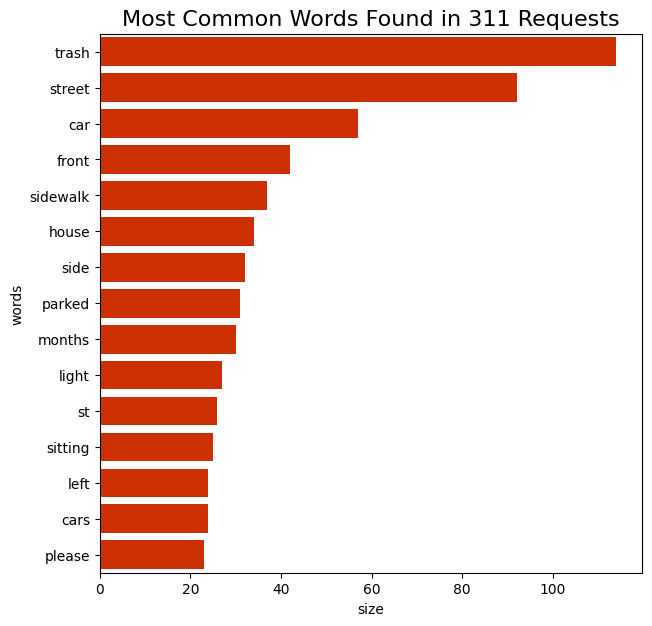

In [140]:
fig, ax = plt.subplots(figsize=(7, 7))

# Plot horizontal bar graph
sns.barplot(
    y="words",
    x="size",
    data=top15,
    ax=ax,
    color="#cc3000",
    saturation=1.0,
)

ax.set_title("Most Common Words Found in 311 Requests", fontsize=16);

**Takeaway:** Philly cares about trash! They don't call it Filthadelphia for nothing...

## Sentiment Analysis

In [141]:
# Data analysis
import geopandas as gpd
import numpy as np
import pandas as pd

# APIs
import requests

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt
import holoviews as hv
import hvplot.pandas

In [142]:
N = words.groupby("words", as_index=False).size().sort_values("size", ascending=False, ignore_index=True)

**The goal**

Determine the "sentiment" of every word in the English language

*The hard way*

Train a machine learning algorithm to classify words as positive vs. negative, given an input training sample of words.

*The easy way*

Luckily, this is a **very common** task in NLP and there are several packages available that have done the hard work for you. 

They provide out-of-the-box sentiment analysis using pre-trained machine learning algorithms.

#### The `textblob` package

First, let's try out a package called `textblob`. Textblob can calculate the "polarity" of words, from negative -1 to postive +1. 

It's algorithm is not particularly sophisticated (as we will see). It was trained on IMDB movie reviews and uses a dictionary mapping of adjectives to sentiment values. So, it knows about a set of adjectives and an approximate *polarity* for those words. 

Let's try it out on the words from the 311 requests

In [143]:
import textblob

First, copy our "words" dataframe and drop any duplicate words. We'll try to calculate the sentiment for each word.

In [144]:
sentiment = words.copy().drop_duplicates(subset=['words'])

In [145]:
sentiment.head()

words
0  street
1   light
2    pole
3     hit
4   drunk

Now, create our "text blob" objects:

In [146]:
blobs = [textblob.TextBlob(word) for word in sentiment['words']]

Now use the ".polarity" attribute to calculate the sentiment:

In [147]:
sentiment["polarity"] = [blob.polarity for blob in blobs]

In [148]:
sentiment.head(10)

words  polarity
0     street       0.0
1      light       0.4
2       pole       0.0
3        hit       0.0
4      drunk      -0.5
5     driver       0.0
6  overnight       0.0
7          4       0.0
8     months       0.0
9        ago       0.0

Most of these words are zero!

In [149]:
(sentiment['polarity'] == 0).sum()

1751

In [150]:
len(sentiment)

1901

Why did this happen?

Because the universe of words that TextBlob knows about is pretty small! Mostly confined to common adjectives/adverbs that appeared in its IMDB review dataset.

Let's take a look at the words with nonzero polarity:

In [151]:
sentiment_nonzero = sentiment.query("polarity != 0")

What are the top 15 most positive words?

In [152]:
sentiment_nonzero.sort_values("polarity", ascending=False, ignore_index=True).head(15)

words  polarity
0           fly  0.800000
1       greatly  0.800000
2        kindly  0.600000
3     hazardous  0.600000
4   appropriate  0.500000
5          many  0.500000
6         grand  0.500000
7            ok  0.500000
8     sincerely  0.500000
9           top  0.500000
10         sure  0.500000
11         safe  0.500000
12       easily  0.433333
13       strong  0.433333
14         huge  0.400000

What are the top 15 most negative words?

In [153]:
sentiment_nonzero.sort_values("polarity", ascending=True, ignore_index=True).head(15)

words  polarity
0       insane -1.000000
1     horrible -1.000000
2        nasty -1.000000
3   disgusting -1.000000
4         crap -0.800000
5         sick -0.714286
6          bad -0.700000
7   impossible -0.666667
8    dangerous -0.600000
9         cold -0.600000
10     cutting -0.600000
11       dirty -0.600000
12        fake -0.500000
13     blindly -0.500000
14   illegally -0.500000

What about a histogram of the sentiment?

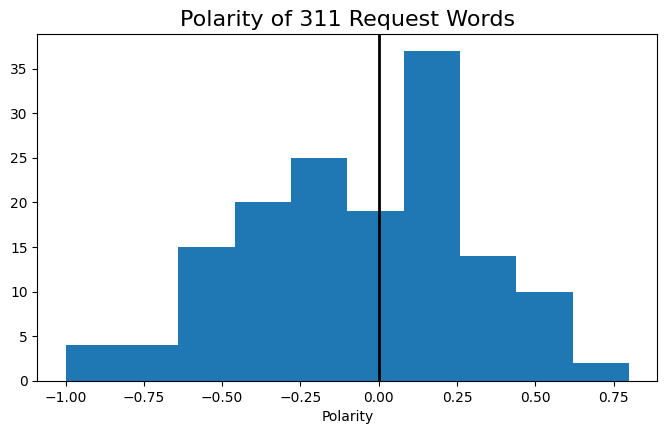

In [154]:
# create a figure and axes
fig, ax = plt.subplots(figsize=(8, 4.5))

# histogram
ax.hist(sentiment_nonzero["polarity"], bins="auto")
ax.axvline(x=0, c="k", lw=2)

# format
ax.set_xlabel("Polarity")
ax.set_title("Polarity of 311 Request Words", fontsize=16);

Hmm...this is surprising! There are many more positive words than I would have guessed!

**What could be going on?**


Most of the 311 requests are in fact *very* negative. They are mostly complaints, after all.

In the previous analysis, TextBlob only knows the sentiment for a *small* subset of the words. This is makes it difficult to produce a comprehensive sentiment for the entirety of the text for each 311 request. This is difficult because context really matters! Let's see an example:

As you can see in the below example, the negation is not picked up by the algorithm: 

In [155]:
textblob.TextBlob("Philly 311 is the best").polarity

1.0

In [156]:
textblob.TextBlob("Philly 311 is NOT the best").polarity

1.0

Both are marked as positive! (because of the word "best")

Can we do better? YES!

#### The `transformers` package

The Hugging Face `transformers` package ([documentation](https://huggingface.co/docs/transformers/index)) provides access to state-of-the-art, pre-trained machine learning algorithms for natural language processing. 

It provides access to more sophisticated machine learning models that are capable of measuring the sentiment of a piece of text using the full context of the words.



We can use the transformers `pipeline()` function to load and run our pre-trained models

In [157]:
from transformers import pipeline

#### Positive/Negative sentiment analysis

We'll start with a version of the [DistilBERT](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) model that has been fine-tuned on the [Stanford Sentiment Treebank](https://huggingface.co/datasets/sst2) dataset.

For an input series of text, this model will predict the POSITIVE / NEGATIVE labels with associated confidence scores. It will tell us how likely it thinks the text is positive or negative.

::: {.callout-tip}
For more info on sentiment analysis with the `transformers` package, check out this [tutorial](https://huggingface.co/docs/transformers/tasks/sequence_classification).
:::

In [158]:
# The name of the model we are using
model = "distilbert-base-uncased-finetuned-sst-2-english"

# Initialize our sentiment analyzer
sentiment_classifier = pipeline(
    task="sentiment-analysis",  # The task we are doing
    model=model,  # The specific model name
    top_k=None,  # Predict all labels, not just top ones
    tokenizer=model,  # Tokenize inputs using model tokenizer
    truncation=True,  # Truncate text if we need to
)

/Users/delmelle/miniforge3/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Now, let's pass our original list of request descriptions to the classifier. 

::: {.callout-note}
We don't need to do any text pre-processing here! We'll just pass in the raw text, so no need to remove stop words, punctuation, etc.
:::


We're now running a much more sophisticated model, so it will take more time to execute! This will likely take 2-3 minutes to run...

In [159]:
%%time

scores = sentiment_classifier(descriptions)

CPU times: user 1min 2s, sys: 1.32 s, total: 1min 4s
Wall time: 8.12 s


What does the response structure look like?

For each description, we get a dictionary containing the label (`POSITIVE` or `NEGATIVE`) and the associated score:

In [160]:
scores[:10]

[[{'label': 'NEGATIVE', 'score': 0.9987655878067017},
  {'label': 'POSITIVE', 'score': 0.0012344114948064089}],
 [{'label': 'NEGATIVE', 'score': 0.9838514924049377},
  {'label': 'POSITIVE', 'score': 0.01614850014448166}],
 [{'label': 'NEGATIVE', 'score': 0.9990053772926331},
  {'label': 'POSITIVE', 'score': 0.0009945863857865334}],
 [{'label': 'NEGATIVE', 'score': 0.9993756413459778},
  {'label': 'POSITIVE', 'score': 0.000624362553935498}],
 [{'label': 'NEGATIVE', 'score': 0.9995806813240051},
  {'label': 'POSITIVE', 'score': 0.00041934079490602016}],
 [{'label': 'NEGATIVE', 'score': 0.97971510887146},
  {'label': 'POSITIVE', 'score': 0.02028488740324974}],
 [{'label': 'NEGATIVE', 'score': 0.9973427653312683},
  {'label': 'POSITIVE', 'score': 0.002657218836247921}],
 [{'label': 'NEGATIVE', 'score': 0.9944135546684265},
  {'label': 'POSITIVE', 'score': 0.0055864667519927025}],
 [{'label': 'NEGATIVE', 'score': 0.9995636343955994},
  {'label': 'POSITIVE', 'score': 0.00043634537723846734}]

Let's unpack this to a more useful format:

In [161]:
yes_no = pd.DataFrame([{d["label"]: d["score"] for d in dd} for dd in scores]).assign(
    text=descriptions
)

In [162]:
yes_no[1]

KeyError: 1

In [163]:
yes_no.head()

NEGATIVE  POSITIVE                                               text
0  0.998766  0.001234  Street light pole was hit by a drunk driver ov...
1  0.983851  0.016149                                          undefined
2  0.999005  0.000995  Right as you enter Grover Washington Middle Sc...
3  0.999376  0.000624                Bump grid is peeling (risen/lifted)
4  0.999581  0.000419                                    Broken sidewalk

**Note:** The scores summed across both labels will sum up to 1. 


**Total sentiment calculation**:
We can calculate the overall score by multiplying the value for each label, e.g., (POSITIVE = +1 and NEGATIVE = -1) by the confidence score for each label. This gives an overall sentiment estimate for each piece of text:

In [166]:
yes_no["sentiment"] = (yes_no["POSITIVE"] * +1) + (yes_no["NEGATIVE"] * -1)

In [167]:
yes_no.head()

NEGATIVE  POSITIVE                                               text  \
0  0.998766  0.001234  Street light pole was hit by a drunk driver ov...   
1  0.983851  0.016149                                          undefined   
2  0.999005  0.000995  Right as you enter Grover Washington Middle Sc...   
3  0.999376  0.000624                Bump grid is peeling (risen/lifted)   
4  0.999581  0.000419                                    Broken sidewalk   

   sentiment  
0  -0.997531  
1  -0.967703  
2  -0.998011  
3  -0.998751  
4  -0.999161

**Question:** Are most of the reviews positive or negative?


Let's take a look at the mean and median:

In [168]:
yes_no['sentiment'].mean()

-0.849014214328964

In [169]:
yes_no['sentiment'].median()

-0.9954968822421506

Ah! By far, most of these are negative!

Philadelphians using the 311 system appear to be *very* upset.

Let's take a look at the overall histogram of sentiment too:

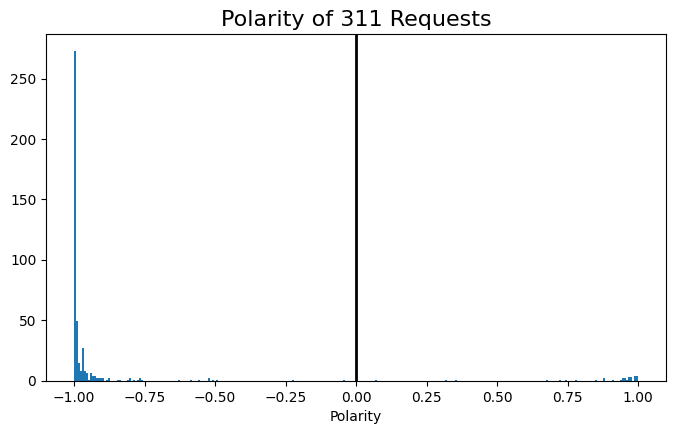

In [171]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 4.5))

# Histogram
ax.hist(yes_no['sentiment'], bins="auto")
ax.axvline(x=0, c="k", lw=2)

# Format
ax.set_xlabel("Polarity")
ax.set_title("Polarity of 311 Requests", fontsize=16);

Whoa! Very negative sentiment!

**This makes much more sense than our earlier results with the Textblob package.**

Let's look at the 10 requests with the lowest sentiment scores:

In [172]:
yes_no.sort_values("sentiment", ascending=True).head(10)

NEGATIVE  POSITIVE                                               text  \
168  0.999817  0.000183  Illegal mechanics Africans constantly taking u...   
347  0.999801  0.000199                                        Is collapse   
406  0.999797  0.000203  There's a bunch of trash outside our church & ...   
121  0.999796  0.000204  The whole 4200 block of Frankford Avenue is a ...   
289  0.999788  0.000212  House is gutted, no permits posted, possibly a...   
409  0.999785  0.000215            Just replaced and does not work/turn on   
422  0.999778  0.000222  appears broken down, someone removed the front...   
61   0.999777  0.000223  no permits full demolition alot of dust front ...   
319  0.999776  0.000224  This is my 3rd request. Trash been there for 9...   
112  0.999772  0.000228  I sent a request to have my garbage picked up ...   

     sentiment  
168  -0.999634  
347  -0.999602  
406  -0.999595  
121  -0.999592  
289  -0.999576  
409  -0.999571  
422  -0.999557  
61   -0.999554  
319  -0.999552  
112  -0.999544

And the 10 requests with the highest sentiment:

In [173]:
yes_no.sort_values("sentiment", ascending=False).head(10)

NEGATIVE  POSITIVE                                               text  \
276  0.000185  0.999815    Murphy Recreation Center rear wall.  Thank you.   
373  0.000289  0.999711            Graffiti on sign. Please and thank you!   
153  0.000361  0.999639  Graffiti and stickers on parking sign pole. Pl...   
246  0.000832  0.999168                                           Again!!!   
214  0.004345  0.995655                                   street light out   
141  0.005592  0.994408                    School district of Philadelphia   
44   0.005714  0.994286  Unleveled sidewalk where water collects/pools ...   
181  0.007140  0.992860  Please help and correct for all my neighbors s...   
449  0.010813  0.989187  Please pick up or remove this illegal dumping ...   
204  0.011188  0.988812          Capri restaurant building a new structure   

     sentiment  
276   0.999631  
373   0.999422  
153   0.999278  
246   0.998336  
214   0.991310  
141   0.988816  
44    0.988572  
181   0.985720  
449   0.978373  
204   0.977624

**Takeaway**

The model is still clearly focusing on some crucial words (please, thank you = "positive") but overall, doing a much, much better job overall of understanding the full context of the text. 

#### Emotion sentiment analysis

The `transformers` package also includes pre-trained models that can predict *emotion* labels. 

As an example, let's try out [this version](https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion) of the DistilBERT model that can predict the following labels for a string of text: anger, fear, sadness, joy, love, and surprise.

In [99]:
# The model
model = "bhadresh-savani/distilbert-base-uncased-emotion"

# Initialize our sentiment analyzer
emotion_classifier = pipeline(
    task="text-classification",  # The task we are doing
    model=model,  # The specific model name
    top_k=None,  # Predict all labels, not just top ones
    tokenizer=model,  # Tokenize inputs using model tokenizer
    truncation=True,  # Truncate text if we need to
)

/Users/delmelle/miniforge3/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Classify the 311 descriptions using our emotions model. Once again, this will likely take 2-3 minutes to run:

In [100]:
%%time 

emotion_scores = emotion_classifier(descriptions)

CPU times: user 1min, sys: 808 ms, total: 1min 1s
Wall time: 7.78 s


In [101]:
emotion_scores[0]

[{'label': 'anger', 'score': 0.5975648760795593},
 {'label': 'fear', 'score': 0.3573427200317383},
 {'label': 'sadness', 'score': 0.03371194005012512},
 {'label': 'joy', 'score': 0.0076051801443099976},
 {'label': 'surprise', 'score': 0.0025551500730216503},
 {'label': 'love', 'score': 0.0012200947385281324}]

Unpack the label/score combos into a DataFrame:

In [102]:
emotion = pd.DataFrame(
    [{d["label"]: d["score"] for d in dd} for dd in emotion_scores]
).assign(text=descriptions)

In [103]:
emotion.head()

anger      fear   sadness       joy  surprise      love  \
0  0.597565  0.357343  0.033712  0.007605  0.002555  0.001220   
1  0.245448  0.670763  0.073318  0.004853  0.004422  0.001196   
2  0.756941  0.023355  0.053293  0.161888  0.002087  0.002436   
3  0.180424  0.740910  0.014274  0.053440  0.007001  0.003952   
4  0.156352  0.799260  0.018653  0.021386  0.002976  0.001373   

                                                text  
0  Business - QUICK STOP 1 Convenience store. The...  
1  trash dumped on sidewalk on NE and NW corners ...  
2  CLEAN UP AFTER YOUR DOG SIGN (SW CORNER) has g...  
3  Lights on southwest corner at intersection of ...  
4                              Traffic light is down

Now, let's calculate the predicted label for each text. This is the label with the highest score for each text.

In [104]:
emotion_labels = ["anger", "fear", "sadness", "joy", "surprise", "love"]

Use the `idxmax()` function to find the column with the maximum value for each row:

In [105]:
emotion[emotion_labels].idxmax(axis=1)

0      anger
1       fear
2      anger
3       fear
4       fear
       ...  
445    anger
446    anger
447     fear
448    anger
449    anger
Length: 450, dtype: object

In [106]:
emotion['prediction'] = emotion[emotion_labels].idxmax(axis=1)

In [107]:
emotion.head()

anger      fear   sadness       joy  surprise      love  \
0  0.597565  0.357343  0.033712  0.007605  0.002555  0.001220   
1  0.245448  0.670763  0.073318  0.004853  0.004422  0.001196   
2  0.756941  0.023355  0.053293  0.161888  0.002087  0.002436   
3  0.180424  0.740910  0.014274  0.053440  0.007001  0.003952   
4  0.156352  0.799260  0.018653  0.021386  0.002976  0.001373   

                                                text prediction  
0  Business - QUICK STOP 1 Convenience store. The...      anger  
1  trash dumped on sidewalk on NE and NW corners ...       fear  
2  CLEAN UP AFTER YOUR DOG SIGN (SW CORNER) has g...      anger  
3  Lights on southwest corner at intersection of ...       fear  
4                              Traffic light is down       fear

What's the breakdown across the predicted labels?

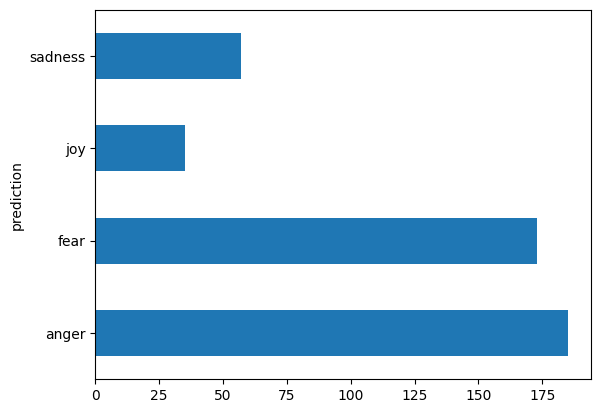

In [108]:
emotion.groupby("prediction").size().plot(kind='barh');

**Takeaway:**  Most descriptions are classified as "fear" or "anger"

How about visualizing the full distribution of scores across all emotions?

Let's get a tidy version for analysis:

In [109]:
emotion_tidy = emotion.melt(
    id_vars=["text"], value_vars=emotion_labels, var_name="emotion", value_name="score"
)

In [110]:
emotion_tidy.head()

text emotion     score
0  Business - QUICK STOP 1 Convenience store. The...   anger  0.597565
1  trash dumped on sidewalk on NE and NW corners ...   anger  0.245448
2  CLEAN UP AFTER YOUR DOG SIGN (SW CORNER) has g...   anger  0.756941
3  Lights on southwest corner at intersection of ...   anger  0.180424
4                              Traffic light is down   anger  0.156352

Make a box plot of the distribution across all emotions:

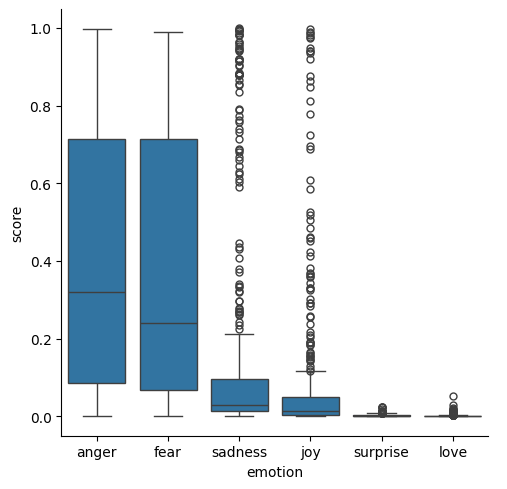

In [111]:
sns.catplot(data=emotion_tidy, x="emotion", y="score", kind="box");

**Takeaway:**

Fear and anger! For emotions other than anger/fear, confidence scores are concentrated near zero, indicating that the text likely does not contain those emotions.

Let's do a deeper dive on some of the emotions:

**Anger**

In [128]:
angry_requests = emotion.query("anger > 0.8").sort_values("anger", ascending=False)

In [129]:
len(angry_requests)

78

In [130]:
angry_requests.head(20)

anger      fear   sadness       joy  surprise      love  \
92   0.996994  0.000990  0.001476  0.000276  0.000129  0.000136   
312  0.996456  0.002156  0.000497  0.000443  0.000158  0.000290   
41   0.996401  0.002041  0.000418  0.000505  0.000237  0.000398   
359  0.995655  0.002437  0.000902  0.000596  0.000175  0.000235   
192  0.995275  0.003162  0.000659  0.000550  0.000168  0.000187   
162  0.995243  0.002330  0.001114  0.000887  0.000213  0.000212   
34   0.994317  0.003598  0.001067  0.000669  0.000153  0.000196   
333  0.993974  0.004460  0.000617  0.000546  0.000175  0.000229   
372  0.992994  0.000841  0.004126  0.000671  0.000511  0.000856   
434  0.990447  0.007542  0.000952  0.000603  0.000202  0.000254   
403  0.989639  0.008171  0.000597  0.001045  0.000232  0.000317   
284  0.988992  0.004564  0.004647  0.001194  0.000298  0.000305   
16   0.981679  0.010278  0.006189  0.001271  0.000325  0.000258   
310  0.979801  0.016671  0.001750  0.001261  0.000253  0.000264   
75   0.978729  0.019101  0.000904  0.000707  0.000255  0.000304   
181  0.977063  0.010807  0.010223  0.001159  0.000404  0.000344   
45   0.974638  0.016841  0.006092  0.001646  0.000494  0.000290   
326  0.973963  0.001187  0.022393  0.000981  0.000734  0.000742   
209  0.969210  0.002118  0.027080  0.001005  0.000264  0.000324   
438  0.964181  0.021770  0.010242  0.002922  0.000570  0.000315   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text  \
92   Every single week people in the neighborhood and sometimes even people outside of the neighborhood leave litter,  bagged trash, and even car parts outside of my grey building at 966 granite st. They seem to always put it next to the wooden light pole near the alley . At one point I even submitted a complaint that included the persons address and name since they foolishly left trash that had mailing labels on it .  I’m getting very frustrated with this filthy inconsiderate people .   
312                                                                                                                                                                                                                                                                                                                                                                      the entire block of 1900 N. American Street lights off.   Dangerous at night for pedestrian. please take care of this matter asap   
41                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Dangerous!   
359                                                                                                                                                                                                                                                                                                                                                            Cars drive extremely fast down street and the corner of Weikel and Clearfield is a dangerous corner and there have been several accidents .   
192                                                                                                                               

**Fear**

And the most fearful:

In [131]:
fearful_requests = emotion.query("fear > 0.8").sort_values("fear", ascending=False)

In [132]:
len(fearful_requests)

55

In [133]:
fearful_requests.head(20)

anger      fear   sadness       joy  surprise      love  \
458  0.004531  0.991316  0.002178  0.001203  0.000531  0.000241   
378  0.006096  0.989046  0.002773  0.000990  0.000878  0.000217   
303  0.006691  0.987627  0.003426  0.001267  0.000766  0.000223   
411  0.006805  0.977448  0.011772  0.001656  0.001972  0.000347   
115  0.017777  0.973921  0.004710  0.002192  0.001031  0.000371   
129  0.020954  0.963613  0.010324  0.002380  0.002246  0.000483   
122  0.015536  0.960532  0.018397  0.003459  0.001661  0.000414   
318  0.029563  0.960280  0.002320  0.004132  0.002882  0.000823   
117  0.037367  0.956178  0.003575  0.001493  0.001055  0.000332   
382  0.037929  0.956143  0.002936  0.001672  0.000994  0.000325   
155  0.005582  0.955887  0.034715  0.001786  0.001572  0.000457   
19   0.032064  0.953550  0.009060  0.003200  0.001713  0.000413   
355  0.033108  0.951790  0.010903  0.001729  0.002068  0.000402   
446  0.043013  0.937064  0.004172  0.012084  0.002647  0.001019   
393  0.055097  0.933314  0.006215  0.003011  0.001652  0.000713   
25   0.019083  0.933243  0.044095  0.001308  0.001735  0.000537   
135  0.023775  0.932685  0.037424  0.004126  0.001333  0.000657   
398  0.045964  0.930909  0.015180  0.005477  0.001942  0.000527   
141  0.052634  0.927947  0.010410  0.006969  0.001449  0.000591   
261  0.057798  0.925652  0.004419  0.008661  0.002469  0.001002   

                                                                                                                                                                                                                                                                                  text  \
458                                   Three Caucasian folks were hanging around the area amongst scattered cardboard boxes, clothes, blankets, etc. This area under the Vine St Expy is susceptible to loitering and small encampments and should be monitored regularly, if possible.   
378                                                                                                                                        Flat tires, very dirty, has not been moved for 4-5 months. Owner is unknown; neither a resident of the block or a neighbor living close by.   
303                                                                                                       Car left crashed into a tree. Possibly stolen. In Fisher park against a tree and partially in the roadway. Potential traffic obstruction and danger. Please have it removed.   
411                                                                                                                                                                                                                                                             Car was in an accident   
115                                                                                                                                                                              There are many trees below the street light , which is out. The pathway under the trees is very dark.   
129                                                                                                                                                                                                      Vehicle stolen and dumped inside Tacony creek park Whitaker gateway entrance.   
122                                                                                                                                                                                                         It has been stationary over a month with expired inspection and flat tire.   
318                                                                                                                              On the southeast corner of the intersection of S. 47th Street and Woodland Avenue.  On the back of the small metal sign holding the crosswalk button.   
117                                                           

**Takeaway:**

Overall, the algorithm is doing a pretty good job picking up the emotion and sentiment in the requests. 

One potential use case for a model like this: *prioritizing responses*. For example:

- You might want to respond more quickly to those that are classified as the most fearful, given that those situations might be the most dangerous. 
- Or, requests that are classified as the angriest might warrant a closer follow-up from a city representative, since many of these requests are likely repeated requests from frustrated residents.

But, once again, we see the limitations of sentiment analysis as text with words like "thank you" and "please" get classified as positive ("joy"):

In [134]:
joyful_requests = emotion.query("joy > 0.8").sort_values("joy", ascending=False)

Not that many requests!

In [135]:
len(joyful_requests)

15

In [136]:
joyful_requests.head(20)

anger      fear   sadness       joy  surprise      love  \
146  0.003696  0.000729  0.001794  0.988631  0.000529  0.004622   
30   0.005533  0.001772  0.003188  0.988004  0.000351  0.001152   
271  0.011084  0.001339  0.004564  0.980372  0.000859  0.001782   
427  0.013238  0.004104  0.003660  0.977238  0.000532  0.001229   
149  0.011952  0.001432  0.003433  0.976533  0.000805  0.005845   
26   0.013683  0.002621  0.007755  0.973872  0.000624  0.001445   
243  0.033909  0.006310  0.005496  0.948654  0.001171  0.004460   
68   0.020574  0.001618  0.031339  0.940549  0.000785  0.005135   
69   0.020574  0.001618  0.031339  0.940549  0.000785  0.005135   
226  0.046364  0.009177  0.006296  0.934953  0.001868  0.001342   
245  0.032104  0.019696  0.005086  0.920101  0.002252  0.020762   
292  0.019780  0.012571  0.089627  0.875396  0.001324  0.001302   
194  0.091725  0.020411  0.018601  0.864389  0.001494  0.003380   
265  0.096089  0.007035  0.019279  0.846568  0.001662  0.029367   
33   0.073166  0.098135  0.010154  0.812572  0.003196  0.002777   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text  \
146                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Graffiti on sign. Please and thank you!   
30                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     I have summitted several abo

*Sentiment analysis* -- a helpful, but imperfect analysis tool!

# PART 3: The Census API

### US Census data is foundational

- Rich data sets with annual releases
- Decennial results plus American Community Survey (ACS) results
- Wide range of topics covered: sex, income, poverty, education, housing

### Getting census data (the new way)<br>census.data.gov

<center>
    <a href=https://data.census.gov/><img src="imgs/census-2.png" width=500></img></a>
</center>

### Example: poverty data
<center>
    <a href="https://data.census.gov/table/ACSST1Y2021.S1701?q=poverty+status&g=010XX00US$0400000&tid=ACSST1Y2021.S1701"><img src="imgs/poverty-1.png" width=900></img></a>
</center>

#### Via the API

[https://api.census.gov/data/2021/acs/acs1?get=NAME,B17001_002E&for=state:*](https://api.census.gov/data/2021/acs/acs1?get=NAME,B17001_002E&for=state:*)

- **Base endpoint:** https://api.census.gov/data/2021/acs/acs1
- **Request parameters:** "get", "for"

<center>
    <img src="imgs/poverty-2.png" width=300></img></a>
</center>

### How to find the right variable names?

The census provides web-based documentation:

- Overview of all data tables: [https://api.census.gov/data.html](https://api.census.gov/data.html)
- All data tables for 2021: [https://api.census.gov/data/2021.html](https://api.census.gov/data/2021.html)
- All variables for 2021 ACS 5-year data set: [https://api.census.gov/data/2021/acs/acs5/variables.html](https://api.census.gov/data/2021/acs/acs5/variables.html)

### A detailed Census API guide

[https://www.census.gov/data/developers/guidance/api-user-guide.html](https://www.census.gov/data/developers/guidance/api-user-guide.html)

### Accessing the API is easier from Python

Several packages provide easier Python interfaces to census data based on the census API.

We'll focus on **`cenpy` - "Explore and download data from Census APIs"**
 - [Documentation](https://cenpy-devs.github.io/cenpy/)
 - [GitHub](https://github.com/cenpy-devs/cenpy)

### Example: the racial "dot" map

![](imgs/racial-dot-map.png)

Source: [Washington Post](https://www.washingtonpost.com/graphics/2018/national/segregation-us-cities/)

Let's make this for Philadelphia in Python!

In [1]:
# First step: import cenpy
#!pip install cenpy
import cenpy

/Users/delmelle/miniforge3/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


#### The "explorer" module

Functions to help you explore the Census API from Python

- [`cenpy.explorer.available`](https://cenpy-devs.github.io/cenpy/generated/cenpy.explorer.available.html#cenpy.explorer.available): Returns information about available datasets in Census API
- [`cenpy.explorer.explain`](https://cenpy-devs.github.io/cenpy/generated/cenpy.explorer.explain.html#cenpy.explorer.explain): Explain a specific Census dataset
- [`cenpy.explorer.fips_table`](https://cenpy-devs.github.io/cenpy/generated/cenpy.explorer.fips_table.html#cenpy.explorer.fips_table): Get a table of FIPS codes for a specific geography

**Note: we can change pandas display options to see all rows/columns and large cells**

In [154]:
# UNCOMMENT TO SEE ALL ROWS/COLUMNS IN DATAFRAMES
# pd.options.display.max_rows = 9999 
# pd.options.display.max_colwidth = 200

#### Step 1: Identify what dataset we want

- Today, we'll use the 5-year American Community Survey (latest available year: 2021)
- Other common datasets: 
    - 1-year ACS datasets as well (latest available year: 2022)
    - 10-year decennial survey (latest available year: 2020)

In [2]:
available = cenpy.explorer.available()

available.head()

/Users/delmelle/miniforge3/lib/python3.10/site-packages/cenpy/explorer.py:70: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  listcols = raw_table.applymap(lambda x: isinstance(x, list)).any()


c_isTimeseries   temporal        spatial c_isAggregate  \
ABSCB2017            NaN  2017/2017  United States          True   
ABSCB2018            NaN  2018/2018  United States          True   
ABSCB2019            NaN  2019/2019             US          True   
ABSCB2020            NaN  2020/2020             US          True   
ABSCB2021            NaN  2021/2021  United States          True   

                    publisher                          references programCode  \
ABSCB2017  U.S. Census Bureau  https://www.census.gov/developers/     006:007   
ABSCB2018  U.S. Census Bureau  https://www.census.gov/developers/     006:007   
ABSCB2019  U.S. Census Bureau  https://www.census.gov/developers/     006:007   
ABSCB2020  U.S. Census Bureau  https://www.census.gov/developers/     006:007   
ABSCB2021  U.S. Census Bureau  https://www.census.gov/developers/     006:007   

                        modified  \
ABSCB2017  2020-04-30 00:00:00.0   
ABSCB2018  2020-10-26 00:00:00.0   
ABSCB2019  2021-08-17 00:00:00.0   
ABSCB2020  2022-08-03 00:00:00.0   
ABSCB2021  2023-07-24 10:30:52.0   

                                                     license    keyword  ...  \
ABSCB2017  https://creativecommons.org/publicdomain/zero/...  (census,)  ...   
ABSCB2018  https://creativecommons.org/publicdomain/zero/...  (census,)  ...   
ABSCB2019  https://creativecommons.org/publicdomain/zero/...  (census,)  ...   
ABSCB2020  https://creativecommons.org/publicdomain/zero/...  (census,)  ...   
ABSCB2021  https://creativecommons.org/publicdomain/zero/...  (census,)  ...   

                                                 description bureauCode  \
ABSCB2017  The Annual Business Survey (ABS) provides info...     006:07   
ABSCB2018  The Annual Business Survey (ABS) provides info...     006:07   
ABSCB2019  The Annual Business Survey (ABS) provides info...     006:07   
ABSCB2020  The Annual Business Survey (ABS) provides info...     006:07   
ABSCB2021  The Annual Business Survey (ABS) provides info...     006:07   

          accessLevel                                              title  \
ABSCB2017      public  Annual Business Survey: Characteristics of Bus...   
ABSCB2018      public  Annual Business Survey: Characteristics of Bus...   
ABSCB2019      public  2019 Annual Business Survey: Characteristics o...   
ABSCB2020      public  2020 Annual Business Survey: Characteristics o...   
ABSCB2021      public  2021 Annual Business Survey: Characteristics o...   

          c_isAvailable c_isCube c_isMicrodata  \
ABSCB2017          True      NaN           NaN   
ABSCB2018          True      NaN           NaN   
ABSCB2019          True      NaN           NaN   
ABSCB2020          True      NaN           NaN   
ABSCB2021          True      NaN           NaN   

                         c_documentationLink c_dataset vintage  
ABSCB2017  https://www.census.gov/developer/  (abscb,)  2017.0  
ABSCB2018  https://www.census.gov/developer/  (abscb,)  2018.0  
ABSCB2019  https://www.census.gov/developer/  (abscb,)  2019.0  
ABSCB2020  https://www.census.gov/developer/  (abscb,)  2020.0  
ABSCB2021  https://www.census.gov/developer/  (abscb,)  2021.0  

[5 rows x 23 columns]

We can use the pandas [`filter()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html) to search for specific identifiers in the dataframe. 

In this case, let's search for the American Community Survey datasets. We'll match index labels using *regular expressions*. 

In particular, we'll search for labels that start with "ACS". In the language of regular expressions, we'll use the "^" to mean "match labels that start with"

For more info on regular expressions, the [documentation for the re module](https://docs.python.org/3/library/re.html) is a good place to start.

In [14]:
# Return a dataframe of all datasets that start with "ACS"
# Axis=0 means to filter the index labels!
acs = available.filter(regex="^ACS", axis=0)

acs

c_isTimeseries   temporal        spatial c_isAggregate  \
ACSCD1132011            NaN  2011/2011  United States          True   
ACSCD1152015            NaN  2015/2015  United States          True   
ACSCP1Y2010             NaN        NaN  United States          True   
ACSCP1Y2011             NaN        NaN  United States          True   
ACSCP1Y2012             NaN        NaN            NaN          True   
...                     ...        ...            ...           ...   
ACSST5Y2018             NaN        NaN            NaN          True   
ACSST5Y2019             NaN        NaN            NaN          True   
ACSST5Y2020             NaN  2020/2020             US          True   
ACSST5Y2021             NaN  2021/2021             US          True   
ACSST5Y2022             NaN  2022/2022             US          True   

                       publisher                          references  \
ACSCD1132011  U.S. Census Bureau   http://www.census.gov/developers/   
ACSCD1152015  U.S. Census Bureau   http://www.census.gov/developers/   
ACSCP1Y2010   U.S. Census Bureau  https://www.census.gov/developers/   
ACSCP1Y2011   U.S. Census Bureau  https://www.census.gov/developers/   
ACSCP1Y2012   U.S. Census Bureau  https://www.census.gov/developers/   
...                          ...                                 ...   
ACSST5Y2018   U.S. Census Bureau  https://www.census.gov/developers/   
ACSST5Y2019   U.S. Census Bureau  https://www.census.gov/developers/   
ACSST5Y2020   U.S. Census Bureau  https://www.census.gov/developers/   
ACSST5Y2021   U.S. Census Bureau  https://www.census.gov/developers/   
ACSST5Y2022   U.S. Census Bureau  https://www.census.gov/developers/   

             programCode               modified  \
ACSCD1132011     006:004             2014-10-06   
ACSCD1152015     006:004             2017-02-10   
ACSCP1Y2010      006:004  2018-09-18 00:00:00.0   
ACSCP1Y2011      006:004  2018-09-18 00:00:00.0   
ACSCP1Y2012      006:004  2018-07-05 00:00:00.0   
...                  ...                    ...   
ACSST5Y2018      006:004  2019-10-22 15:36:29.0   
ACSST5Y2019      006:004  2020-04-03 00:00:00.0   
ACSST5Y2020      006:004  2021-07-13 00:00:00.0   
ACSST5Y2021      006:004  2022-08-08 00:00:00.0   
ACSST5Y2022      006:004  2023-09-05 12:01:35.0   

                                                        license    keyword  \
ACSCD1132011  http://creativecommons.org/publicdomain/zero/1.0/  (census,)   
ACSCD1152015  http://creativecommons.org/publicdomain/zero/1.0/  (census,)   
ACSCP1Y2010   https://creativecommons.org/publicdomain/zero/...  (census,)   
ACSCP1Y2011   https://creativecommons.org/publicdomain/zero/...  (census,)   
ACSCP1Y2012   https://creativecommons.org/publicdomain/zero/...  (census,)   
...                                                         ...        ...   
ACSST5Y2018   https://creativecommons.org/publicdomain/zero/...  (census,)   
ACSST5Y2019   https://creativecommons.org/publicdomain/zero/...  (census,)   
ACSST5Y2020   https://creativecommons.org/publicdomain/zero/...  (census,)   
ACSST5Y2021   https://creativecommons.org/publicdomain/zero/...  (census,)   
ACSST5Y2022   https://creativecommons.org/publicdomain/zero/...  (census,)   

              ...                                        description  \
ACSCD1132011  ...  The American Community Survey (ACS) is a natio...   
ACSCD1152015  ...  The American Community Survey (ACS) is an ongo...   
ACSCP1Y2010   ...  The American Community Survey (ACS) is an ongo...   
ACSCP1Y2011   ...  The American Community Survey (ACS) is an ongo...   
ACSCP1Y2012   ...  The American Community Survey (ACS) is an ongo...   
...           ...                                                ...   
ACSST5Y2018   ...  The American Community Survey (ACS) is an ongo...   
ACSST5Y2019   ...  The American Community Survey (ACS) is an ongo...   
ACSST5Y2020   ...  The American Community Survey (ACS) is an ongo...   
ACSST5Y2021   ...  The Am

Many flavors of ACS datasets are available — we want to use the *detailed tables* version, specifically the 5-year survey. 

The relevant identifiers start with: "ACSDT5Y".

In [15]:
# Return a dataframe of all datasets that start with "ACSDT5Y"
available.filter(regex="^ACSDT5Y", axis=0)

c_isTimeseries   temporal        spatial c_isAggregate  \
ACSDT5Y2009                NaN        NaN            NaN          True   
ACSDT5Y2010                NaN        NaN  United States          True   
ACSDT5Y2011                NaN        NaN            NaN          True   
ACSDT5Y2012                NaN        NaN            NaN          True   
ACSDT5Y2013                NaN        NaN            NaN          True   
ACSDT5Y2014                NaN        NaN            NaN          True   
ACSDT5Y2015                NaN        NaN            NaN          True   
ACSDT5Y2016                NaN        NaN            NaN          True   
ACSDT5Y2017                NaN        NaN            NaN          True   
ACSDT5Y2018                NaN        NaN            NaN          True   
ACSDT5Y2019                NaN        NaN            NaN          True   
ACSDT5Y2020                NaN  2020/2020             US          True   
ACSDT5Y2021                NaN  2021/2021             US          True   
ACSDT5Y2022                NaN  2022/2022             US          True   
ACSDT5YAIAN2010            NaN        NaN            NaN          True   
ACSDT5YAIAN2015            NaN        NaN            NaN          True   
ACSDT5YAIAN2021            NaN  2021/2021             US          True   
ACSDT5YSPT2010             NaN        NaN            NaN          True   
ACSDT5YSPT2015             NaN        NaN            NaN          True   
ACSDT5YSPT2021             NaN  2021/2021             US          True   

                          publisher                          references  \
ACSDT5Y2009      U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5Y2010      U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5Y2011      U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5Y2012      U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5Y2013      U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5Y2014      U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5Y2015      U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5Y2016      U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5Y2017      U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5Y2018      U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5Y2019      U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5Y2020      U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5Y2021      U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5Y2022      U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5YAIAN2010  U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5YAIAN2015  U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5YAIAN2021  U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5YSPT2010   U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5YSPT2015   U.S. Census Bureau  https://www.census.gov/developers/   
ACSDT5YSPT2021   U.S. Census Bureau  https://www.census.gov/developers/   

                programCode               modified  \
ACSDT5Y2009         006:004  2019-08-27 13:11:18.0   
ACSDT5Y2010         006:004  2018-07-04 00:00:00.0   
ACSDT5Y2011         006:004  2018-07-04 00:00:00.0   
ACSDT5Y2012         006:004  2018-07-04 00:00:00.0   
ACSDT5Y2013         006:004  2018-07-04 00:00:00.0   
ACSDT5Y2014         006:004  2018-07-04 00:00:00.0   
ACSDT5Y2015         006:004  2018-07-05 00:00:00.0   
ACSDT5Y2016         006:004  2018-07-05 00:00:00.0   
ACSDT5Y2017         006:004  2018-08-21 07:11:43.0   
ACSDT5Y2018         006:004  2019-10-22 16:28:02.0   
ACSDT5Y2019         006:004  2020-04-03 00:00:00.0   
ACSDT5Y2020         006:004  2021-07-13 00:00:00.0   
ACSDT5Y2021         006:004  2022-08-08 00:00:00.0   
ACSDT5Y2022         006:004  2023-09-05 12:01:39.0   
ACSDT5YAIAN2010     006:004  2019-10-24 07:18:57.0   
ACSDT5YAIAN2015     0

Let's use the latest available 5-year data (2021). We can use the `explain()` function to print out a description of the dataset:

In [17]:
cenpy.explorer.explain("ACSDT5Y2021")

{'American Community Survey: 5-Year Estimates: Detailed Tables 5-Year': 'The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demographic, and housing characteristics of the U.S. population. Summary files include the following geographies: nation, all states (including DC and Puerto Rico), all metropolitan areas, all congressional districts, all counties, all places, and all tracts and block groups. Summary files contain the most detailed cross-tabulations, many of which are published down to block groups. The data are population and housing counts. There are over 64,000 variables in this dataset.'}

#### Step 2: Initialize the API connection

Use the `cenpy.remote.APIConnection` object, and pass it the name of the dataset.

In [18]:
acs = cenpy.remote.APIConnection("ACSDT5Y2021")

#### Step 3: Find the variables we want to load

The `.variables` attribute stores the available variables (across all Census tables). 

We can use the `varslike()` function to search the `variables` dataframe (it's just a simple wrapper around the pandas `filter()` function).

In [19]:
len(acs.variables)

27927

In [20]:
acs.variables.head(n=10)

label  \
for                                 Census API FIPS 'for' clause   
in                                   Census API FIPS 'in' clause   
ucgid                 Uniform Census Geography Identifier clause   
B24022_060E    Estimate!!Total:!!Female:!!Service occupations...   
B19001B_014E              Estimate!!Total:!!$100,000 to $124,999   
B07007PR_019E  Estimate!!Total:!!Moved from different municip...   
B19101A_004E                Estimate!!Total:!!$15,000 to $19,999   
B24022_061E    Estimate!!Total:!!Female:!!Service occupations...   
B19001B_013E                Estimate!!Total:!!$75,000 to $99,999   
B07007PR_018E  Estimate!!Total:!!Moved from different municip...   

                                                         concept  \
for                           Census API Geography Specification   
in                            Census API Geography Specification   
ucgid                         Census API Geography Specification   
B24022_060E    SEX BY OCCUPATION AND MEDIAN EARNINGS IN THE P...   
B19001B_014E   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 202...   
B07007PR_019E  GEOGRAPHICAL MOBILITY IN THE PAST YEAR BY CITI...   
B19101A_004E   FAMILY INCOME IN THE PAST 12 MONTHS (IN 2021 I...   
B24022_061E    SEX BY OCCUPATION AND MEDIAN EARNINGS IN THE P...   
B19001B_013E   HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 202...   
B07007PR_018E  GEOGRAPHICAL MOBILITY IN THE PAST YEAR BY CITI...   

              predicateType     group limit predicateOnly  \
for                fips-for       N/A     0          True   
in                  fips-in       N/A     0          True   
ucgid                 ucgid       N/A     0          True   
B24022_060E             int    B24022     0           NaN   
B19001B_014E            int   B19001B     0           NaN   
B07007PR_019E           int  B07007PR     0           NaN   
B19101A_004E            int   B19101A     0           NaN   
B24022_061E             int    B24022     0           NaN   
B19001B_013E            int   B19001B     0           NaN   
B07007PR_018E           int  B07007PR     0           NaN   

              hasGeoCollectionSupport  \
for                               NaN   
in                                NaN   
ucgid                            True   
B24022_060E                       NaN   
B19001B_014E                      NaN   
B07007PR_019E                     NaN   
B19101A_004E                      NaN   
B24022_061E                       NaN   
B19001B_013E                      NaN   
B07007PR_018E                     NaN   

                                                attributes required  
for                                                    NaN      NaN  
in                                                     NaN      NaN  
ucgid                                                  NaN      NaN  
B24022_060E          B24022_060EA,B24022_060M,B24022_060MA      NaN  
B19001B_014E      B19001B_014EA,B19001B_014M,B19001B_014MA      NaN  
B07007PR_019E  B07007PR_019EA,B07007PR_019M,B07007PR_019MA      NaN  
B19101A_004E      B19101A_004EA,B19101A_004M,B19101A_004MA      NaN  
B24022_061E          B24022_061EA,B24022_061M,B24022_061MA      NaN  
B19001B_013E      B19001B_013EA,B19001B_013M,B19001B_013MA      NaN  
B07007PR_018E  B07007PR_018EA,B07007PR_018M,B07007PR_018MA      NaN

We're interested in variables about hispanic origin broken down by race — let's see if we can find the variables where the "Concept" column starts with "RACE"

In [8]:
#acs.varslike?

In [21]:
race_matches = acs.varslike(
    pattern="HISPANIC OR LATINO ORIGIN BY RACE",
    by="concept",  # searches along concept column
).sort_index()

In [22]:
race_matches

label  \
B03002_001E                                   Estimate!!Total:   
B03002_002E          Estimate!!Total:!!Not Hispanic or Latino:   
B03002_003E  Estimate!!Total:!!Not Hispanic or Latino:!!Whi...   
B03002_004E  Estimate!!Total:!!Not Hispanic or Latino:!!Bla...   
B03002_005E  Estimate!!Total:!!Not Hispanic or Latino:!!Ame...   
B03002_006E  Estimate!!Total:!!Not Hispanic or Latino:!!Asi...   
B03002_007E  Estimate!!Total:!!Not Hispanic or Latino:!!Nat...   
B03002_008E  Estimate!!Total:!!Not Hispanic or Latino:!!Som...   
B03002_009E  Estimate!!Total:!!Not Hispanic or Latino:!!Two...   
B03002_010E  Estimate!!Total:!!Not Hispanic or Latino:!!Two...   
B03002_011E  Estimate!!Total:!!Not Hispanic or Latino:!!Two...   
B03002_012E              Estimate!!Total:!!Hispanic or Latino:   
B03002_013E  Estimate!!Total:!!Hispanic or Latino:!!White a...   
B03002_014E  Estimate!!Total:!!Hispanic or Latino:!!Black o...   
B03002_015E  Estimate!!Total:!!Hispanic or Latino:!!America...   
B03002_016E  Estimate!!Total:!!Hispanic or Latino:!!Asian a...   
B03002_017E  Estimate!!Total:!!Hispanic or Latino:!!Native ...   
B03002_018E  Estimate!!Total:!!Hispanic or Latino:!!Some ot...   
B03002_019E  Estimate!!Total:!!Hispanic or Latino:!!Two or ...   
B03002_020E  Estimate!!Total:!!Hispanic or Latino:!!Two or ...   
B03002_021E  Estimate!!Total:!!Hispanic or Latino:!!Two or ...   
GEO_ID                                               Geography   

                                                       concept predicateType  \
B03002_001E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_002E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_003E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_004E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_005E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_006E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_007E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_008E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_009E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_010E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_011E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_012E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_013E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_014E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_015E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_016E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_017E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_018E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_019E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_020E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
B03002_021E                  HISPANIC OR LATINO ORIGIN BY RACE           int   
GEO_ID       GEOGRAPHICAL MOBILITY IN THE PAST YEAR BY INDI...        string   

                                                         group limit  \
B03002_001E                                             B03002     0   
B03002_002E                                             B03002     0   
B03002_003E                                             B03002     0   
B03002_004E                                             B03002     0   
B03002_005E                                             B03002     0   
B03002_006E                                             B03002     0   
B03002_007E                                             B03002     0   
B03002_008E                                             B03002     0   
B03002_009E                                      

It looks like the table we want is "B03002" — we can also easily filter for all variables in this table

In [23]:
variables = [
    "NAME",
    "B03002_001E", # Total
    "B03002_003E", # Not Hispanic, White
    "B03002_004E", # Not Hispanic, Black
    "B03002_005E", # Not Hispanic, American Indian
    "B03002_006E", # Not Hispanic, Asian
    "B03002_007E", # Not Hispanic, Native Hawaiian
    "B03002_008E", # Not Hispanic, Other
    "B03002_009E", # Not Hispanic, Two or More Races
    "B03002_012E", # Hispanic
]

We've also include the "NAME" variable which returns the name of the Census geography we are querying for.

#### Step 4: Identify the geographies to use

The Census API use heirarchy of geographies when requesting data.

For example, you cannot just request data for a specific county — you need to specify the state *and* the county.

<img src="imgs/census-hierarchy.png" width=400></img>

**Common hierarchies**

- State --> county
- State --> place (e.g., cities)
- State --> county --> tract
- State --> county --> tract --> block group

**Tip:** Use the `.geographies` attribute

This allows you to see:

1. What geographies are available for a specific dataset
1. The other required geographies in the heirarchy

In [24]:
acs.geographies['fips']

name geoLevelDisplay referenceDate requires  \
0                             us             010    2021-01-01      NaN   
1                         region             020    2021-01-01      NaN   
2                       division             030    2021-01-01      NaN   
3                          state             040    2021-01-01      NaN   
4                         county             050    2021-01-01  [state]   
..                           ...             ...           ...      ...   
82     public use microdata area             795    2021-01-01  [state]   
83      zip code tabulation area             860    2021-01-01      NaN   
84  school district (elementary)             950    2021-01-01  [state]   
85   school district (secondary)             960    2021-01-01  [state]   
86     school district (unified)             970    2021-01-01  [state]   

   wildcard optionalWithWCFor  
0       NaN               NaN  
1       NaN               NaN  
2       NaN               NaN  
3       NaN               NaN  
4   [state]             state  
..      ...               ...  
82  [state]             state  
83      NaN               NaN  
84  [state]             state  
85  [state]             state  
86  [state]             state  

[87 rows x 6 columns]

For the racial dot map, we'll use the most granular available geography: block group.

The hierarchy is: state --> county --> tract --> block group but we can use the `*` operator for tracts so we'll need to know the **FIPS codes for PA and Philadelphia County**

In [26]:
counties = cenpy.explorer.fips_table("COUNTY")
counties.head()

0  1  2               3   4
0  AL  1  1  Autauga County  H1
1  AL  1  3  Baldwin County  H1
2  AL  1  5  Barbour County  H1
3  AL  1  7     Bibb County  H1
4  AL  1  9   Blount County  H1

In [27]:
# Trim to just Philadelphia
# Search for rows where name contains "Philadelphia"
counties.loc[ counties[3].str.contains("Philadelphia") ]

0   1    2                    3   4
2294  PA  42  101  Philadelphia County  H6

For Philadelphia County, the FIPS codes are:

- Philadelphia County: "101" 
- PA: "42"

In [28]:
philly_county_code = "101"
pa_state_code = "42"

You can also look up FIPS codes on Google! Wikipedia is usually a trustworthy source...

#### Step 5: Build the query (finally)

We'll use the `.query()` function, which takes the following arguments:

1. `cols` - the list of variables desired from the dataset
1. `geo_unit` - string denoting the smallest geographic unit; syntax is "name:FIPS"
1. `geo_filter` - dictionary containing groupings of geo_units, if required by the hierarchy


In [29]:
philly_demo_data = acs.query(
    cols=variables,
    geo_unit="block group:*",
    geo_filter={"state": pa_state_code, "county": philly_county_code, "tract": "*"},
)


philly_demo_data.head()

NAME B03002_001E B03002_003E  \
0  Block Group 1, Census Tract 1.01, Philadelphia...           0           0   
1  Block Group 2, Census Tract 1.01, Philadelphia...           0           0   
2  Block Group 3, Census Tract 1.01, Philadelphia...           0           0   
3  Block Group 4, Census Tract 1.01, Philadelphia...        1129         770   
4  Block Group 5, Census Tract 1.01, Philadelphia...         875         683   

  B03002_004E B03002_005E B03002_006E B03002_007E B03002_008E B03002_009E  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3          11           0          88           0           0          37   
4           0           0          69           0           0           0   

  B03002_012E state county   tract block group  
0           0    42    101  000101           1  
1           0    42    101  000101           2  
2           0    42    101  000101           3  
3         223    42    101  000101           4  
4         123    42    101  000101           5

In [30]:
len(philly_demo_data)

1338

**Important:** data is returned as strings rather than numeric values

In [31]:
for variable in variables:
    # Convert all variables EXCEPT for NAME
    if variable != "NAME":
        philly_demo_data[variable] = philly_demo_data[variable].astype(float)

**What if we mess up the geographic hierarchy?**

If you forget to include required parts of the geography heirarchy, you'll get an error!

In [32]:
acs.query(
    cols=variables,
    geo_unit = "block group",
    geo_filter = {"state": pa_state_code, "county": "*"},
)

NAME B03002_001E  \
0      Block Group 1, Census Tract 301.01, Adams Coun...         958   
1      Block Group 2, Census Tract 301.01, Adams Coun...        1691   
2      Block Group 1, Census Tract 301.03, Adams Coun...        2268   
3      Block Group 1, Census Tract 301.04, Adams Coun...        1066   
4      Block Group 2, Census Tract 301.04, Adams Coun...        2447   
...                                                  ...         ...   
10168  Block Group 2, Census Tract 240.01, York Count...        2210   
10169  Block Group 3, Census Tract 240.01, York Count...         656   
10170  Block Group 4, Census Tract 240.01, York Count...         534   
10171  Block Group 1, Census Tract 240.02, York Count...        2245   
10172  Block Group 2, Census Tract 240.02, York Count...        1241   

      B03002_003E B03002_004E B03002_005E B03002_006E B03002_007E B03002_008E  \
0             780          47           0           1           0           0   
1            1502           0           0           1           0           8   
2            2258           0           0           0           0           0   
3            1060           0           0           0           0           0   
4            2277           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
10168        2131          40          15           0           0           0   
10169         656           0           0           0           0           0   
10170         472           0           0           0           0           0   
10171        2182           0           0          12           0           0   
10172        1131          13          13           2           0           2   

      B03002_009E B03002_012E state county   tract block group  
0               4         126    42    001  030101           1  
1              74         106    42    001  030101           2  
2              10           0    42    001  030103           1  
3               6           0    42    001  030104           1  
4              71          99    42    001  030104           2  
...           ...         ...   ...    ...     ...         ...  
10168          24           0    42    133  024001           2  
10169           0           0    42    133  024001           3  
10170          14          48    42    133  024001           4  
10171          41          10    42    133  024002           1  
10172           9          71    42    133  024002           2  

[10173 rows x 14 columns]

#### Step 6: We need the block group geometries too!

Use the [`pygris` package](https://walker-data.com/pygris/) to download geometries. It's a port of the R package `tigris` to Python!

In [33]:
#!pip install pygris
import pygris

There's a function to return each of the main Census geographies. We'll use the `block_groups()` function.

In [34]:
#pygris.block_groups?

In [35]:
philly_block_groups = pygris.block_groups(
    state=pa_state_code, county=philly_county_code, year=2021
)

In [36]:
philly_block_groups.head()

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
124      42      101  989100        2  421019891002  Block Group 2  G5030   
125      42      101  989100        4  421019891004  Block Group 4  G5030   
126      42      101  989100        3  421019891003  Block Group 3  G5030   
156      42      101  028300        1  421010283001  Block Group 1  G5030   
158      42      101  028400        1  421010284001  Block Group 1  G5030   

    FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
124        S   373653    7060  +40.0373207  -075.0177378   
125        S  1399991  948653  +40.0407424  -074.9975532   
126        S   820212  566882  +40.0297287  -075.0119000   
156        S    69892       0  +40.0299231  -075.1408226   
158        S    94792       0  +40.0293965  -075.1380180   

                                              geometry  
124  POLYGON ((-75.02195 40.03435, -75.02191 40.034...  
125  POLYGON ((-75.01254 40.03803, -75.01195 40.038...  
126  POLYGON ((-75.02251 40.03083, -75.02176 40.031...  
156  POLYGON ((-75.14202 40.02998, -75.14200 40.030...  
158  POLYGON ((-75.13966 40.02974, -75.13930 40.031...

In [162]:
len(philly_block_groups)

1338

#### Step 7: Merge the demographic data with geometries

Merge based on multiple columns: state, county, tract, and block group IDs.

The relevant columns are: 

- "STATEFP", "COUNTYFP", "TRACTCE", "BLKGRCE" in the spatial data
- "state", "county", "tract", "block group" in the non-spatial data

In [37]:
philly_demo_final = philly_block_groups.merge(
    philly_demo_data,
    left_on=["STATEFP", "COUNTYFP", "TRACTCE", "BLKGRPCE"],
    right_on=["state", "county", "tract", "block group"],
)

In [38]:
philly_demo_final.head()

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      42      101  989100        2  421019891002  Block Group 2  G5030   
1      42      101  989100        4  421019891004  Block Group 4  G5030   
2      42      101  989100        3  421019891003  Block Group 3  G5030   
3      42      101  028300        1  421010283001  Block Group 1  G5030   
4      42      101  028400        1  421010284001  Block Group 1  G5030   

  FUNCSTAT    ALAND  AWATER  ... B03002_005E B03002_006E B03002_007E  \
0        S   373653    7060  ...         0.0         0.0         0.0   
1        S  1399991  948653  ...         0.0         0.0         0.0   
2        S   820212  566882  ...         0.0         6.0         0.0   
3        S    69892       0  ...         0.0         0.0         0.0   
4        S    94792       0  ...         0.0       334.0         0.0   

  B03002_008E  B03002_009E  B03002_012E  state  county   tract  block group  
0         0.0          0.0          0.0     42     101  989100            2  
1         0.0          0.0          0.0     42     101  989100            4  
2         0.0         16.0        153.0     42     101  989100            3  
3         0.0          0.0          0.0     42     101  028300            1  
4         0.0          0.0         28.0     42     101  028400            1  

[5 rows x 27 columns]

**We're done! Plot it to make sure it makes sense**

Plot the total population using `geopandas.explore()`...

In [39]:
philly_demo_final.explore(column="B03002_001E", tiles="CartoDB positron")

#### Now let's prep the data for the dot map

1. Rename columns to more user-friendly versions
1. Add a general "Other" category

In [40]:
# Rename columns
philly_demo_final = philly_demo_final.rename(
    columns={
        "B03002_001E": "Total",  # Total
        "B03002_003E": "White",  # Not Hispanic, White
        "B03002_004E": "Black",  # Not Hispanic, Black
        "B03002_005E": "AI/AN",  # Not Hispanic, American Indian
        "B03002_006E": "Asian",  # Not Hispanic, Asian
        "B03002_007E": "NH/PI",  # Not Hispanic, Native Hawaiian
        "B03002_008E": "Other_",  # Not Hispanic, Other
        "B03002_009E": "Two Plus",  # Not Hispanic, Two or More Races
        "B03002_012E": "Hispanic",  # Hispanic
    }
)

In [41]:
# Add an "Other" column 
cols = ['AI/AN', 'NH/PI','Other_', 'Two Plus']
philly_demo_final['Other'] = philly_demo_final[cols].sum(axis=1)

#### Define a function to create random points

Given a polygon, create randomly distributed points that fall within the polygon.

In [56]:
from shapely.geometry import Point

In [57]:
def random_points_in_polygon(number, polygon):
    """
    Generate a random number of points within the 
    specified polygon.
    """
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    i= 0
    while i < number:
        point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points

**Random points example**

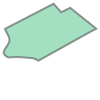

In [58]:
# get the first block group polygon in the data set
geo = philly_demo_final.iloc[0].geometry

geo

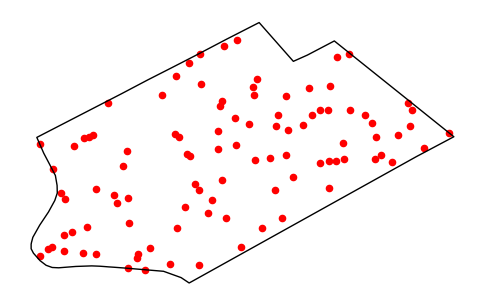

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import random
import pandas as pd

# Function to generate random points within a polygon
def random_points_in_polygon(num_points, polygon):
    minx, miny, maxx, maxy = polygon.bounds
    points = []
    while len(points) < num_points:
        random_point = Point([random.uniform(minx, maxx), random.uniform(miny, maxy)])
        if polygon.contains(random_point):
            points.append(random_point)
    return points

# Assume `geo` is your polygon geometry
# Replace `geo` with your actual polygon data
# Example: geo = gpd.read_file('your_file.shp').geometry[0]

fig, ax = plt.subplots(figsize=(6, 6))

# Generate random points
random_points = random_points_in_polygon(100, geo)

# Plot random points
gpd.GeoSeries(random_points).plot(ax=ax, markersize=20, color="red")

# Plot boundary of polygon (block group)
gpd.GeoSeries([geo]).plot(ax=ax, facecolor="none", edgecolor="black")

# Remove axis for a clean look
ax.set_axis_off()

plt.show()


In [65]:
def generate_dot_map(data, people_per_dot):
    """
    Given a GeoDataFrame with demographic columns, generate a dot 
    map according to the population in each geometry.
    """
    results = []
    for field in ["White", "Hispanic", "Black", "Asian", "Other"]:

        # generate random points
        pts = data.apply(
            lambda row: random_points_in_polygon(
                row[field] / people_per_dot, row["geometry"]
            ),
            axis=1,
        )

        # combine into single GeoSeries
        pts = gpd.GeoSeries(pts.apply(pd.Series).stack(), dtype=object, crs=data["geometry"].crs)
        pts.name = "geometry"

        # make into a GeoDataFrame
        pts = gpd.GeoDataFrame(pts)
        pts["field"] = field

        # save
        results.append(pts)

    return gpd.GeoDataFrame(pd.concat(results), crs=data["geometry"].crs).reset_index(
        drop=True
    )

#### Calculate the dot map

In [66]:
dot_map = generate_dot_map(philly_demo_final, people_per_dot=50)

In [67]:
print("number of points = ", len(dot_map))

number of points =  34470


In [176]:
dot_map.tail()

geometry  field
34465  POINT (-75.23503 40.06450)  Other
34466  POINT (-75.23324 40.06886)  Other
34467  POINT (-75.07922 40.03713)  Other
34468  POINT (-75.07914 40.03602)  Other
34469  POINT (-75.07986 40.03637)  Other

#### Now let's plot it

In [68]:
# setup a custom color map from ColorBrewer
from matplotlib.colors import ListedColormap


colors = {
    "Black": "steelblue",
    "White": "tomato",
    "Hispanic": "khaki",
    "Asian": "palegreen",
    "Other": "darkgray",
}

cmap = ListedColormap([t[1] for t in sorted(colors.items())])

In [69]:
# Convert to 3857
dot_map_3857 = dot_map.to_crs(epsg=3857)

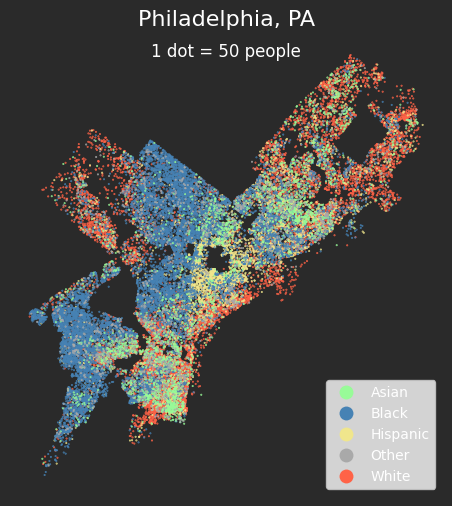

In [70]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(6, 6), facecolor="#2a2a2a")

# Plot
dot_map_3857.plot(
    ax=ax,
    column="field",
    categorical=True,
    legend=True,
    alpha=1,
    markersize=0.2,
    cmap=cmap,
    legend_kwds=dict(labelcolor="white"),
)

# format
ax.set_title("Philadelphia, PA", fontsize=16, color="white")
ax.text(
    0.5,
    0.95,
    "1 dot = 50 people",
    fontsize=12,
    transform=ax.transAxes,
    ha="center",
    color="white",
)
ax.set_axis_off()

## That's it!